<a href="https://colab.research.google.com/github/ylh86280/ylh86280/blob/main/ylhtestc_collab_P4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importation des bibliothèques requises


In [15]:
pip install -U https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


     \ 34.6 MB 671 kB/s
     |████████████████████████████████| 10.1 MB 70 kB/s 
     |████████████████████████████████| 636 kB 53.4 MB/s 
     |████████████████████████████████| 102 kB 70.6 MB/s 
     |████████████████████████████████| 675 kB 45.9 MB/s 
     |████████████████████████████████| 3.1 MB 48.2 MB/s 
     |████████████████████████████████| 62 kB 901 kB/s 
     |████████████████████████████████| 812 kB 40.6 MB/s 
     |████████████████████████████████| 28.5 MB 47 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.0.0-py2.py3-none-any.whl size=248524 sha256=88d2b29cae9fff3180b07eb052a27a051533042e87b299f5e8d14a388c6c7b9b
  Stored in directory: /tmp/pip-ephem-wheel-cache-3iyuhrbc/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=472d039645e6ee44ba30bcaa3ca0791f1e6ca171beb0cdaaf18055fb6f18a588
  Stored in directory: /root/.cache/pip/wheels/70/e1/52/5b14d2

In [2]:
import pandas as pd   #annalyse
import numpy as np  #tableaux
import seaborn as sns   #visualiser les donnees
import matplotlib.pyplot as plt  #visualiser les données
import csv
import urllib
import requests


# Get the data

In [22]:
#url='https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking#2015-building-energy-benchmarking.csv'
#r=requests.get(url)
#response=r.iter_lines()
#df=csv.reader(response, delimiter=',')
#df

In [10]:
from google.colab import files
data_to_load = files.upload()

Saving 2015-building-energy-benchmarking.csv to 2015-building-energy-benchmarking (2).csv
Saving 2016-building-energy-benchmarking.csv to 2016-building-energy-benchmarking.csv


In [11]:
import io
df_2015 = pd.read_csv(io.BytesIO(data_to_load['2015-building-energy-benchmarking.csv']))
df_2016 = pd.read_csv(io.BytesIO(data_to_load['2016-building-energy-benchmarking.csv']))

In [17]:
print('Fichier 2015: {}'.format(df_2015.shape))
print('Fichier 2016: {}'.format(df_2016.shape))

Fichier 2015: (3340, 47)
Fichier 2016: (3376, 46)


In [35]:
df_2015.columns=['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', 'Comments', 'ComplianceStatus', 'Outlier',
       '2010 Census Tracts',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'City', 'SPD Beats', 'ZipCode']

In [36]:
for ycol in df_2015.columns:
        if ycol not in df_2016.columns: 
           print('La variable {} ne figure pas dans le 2ème fichier'.format(ycol))

La variable Location ne figure pas dans le 2ème fichier
La variable OtherFuelUse(kBtu) ne figure pas dans le 2ème fichier
La variable GHGEmissions(MetricTonsCO2e) ne figure pas dans le 2ème fichier
La variable GHGEmissionsIntensity(kgCO2e/ft2) ne figure pas dans le 2ème fichier
La variable 2010 Census Tracts ne figure pas dans le 2ème fichier
La variable Seattle Police Department Micro Community Policing Plan Areas ne figure pas dans le 2ème fichier
La variable SPD Beats ne figure pas dans le 2ème fichier


In [37]:
for ycol in df_2016.columns:
        if ycol not in df_2015.columns: 
           print('La variable {} ne figure pas dans le 2ème fichier'.format(ycol))

La variable Address ne figure pas dans le 2ème fichier
La variable State ne figure pas dans le 2ème fichier
La variable Latitude ne figure pas dans le 2ème fichier
La variable Longitude ne figure pas dans le 2ème fichier
La variable TotalGHGEmissions ne figure pas dans le 2ème fichier
La variable GHGEmissionsIntensity ne figure pas dans le 2ème fichier


In [38]:
ydf = pd.concat([df_2015, df_2016], ignore_index=True)

In [40]:
ydf.shape

(6716, 53)

In [43]:
ydf.Location[0]

'{\'latitude\': \'47.61219025\', \'longitude\': \'-122.33799744\', \'human_address\': \'{"address": "405 OLIVE WAY", "city": "SEATTLE", "state": "WA", "zip": "98101"}\'}'

In [42]:
ydf.sort_values(by=['OSEBuildingID'],ascending=True).head(6)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comments,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City,SPD Beats,ZipCode,Address,State,Latitude,Longitude,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6981428.0,7097539.0,2023032.0,1.080307e+06,3686160.0,12724.00000,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081.0,NaN,NaN,NaN,NaN,NaN,NaN
3340,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,NaN,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.0,1.156514e+06,3946027.0,12764.52930,1276453.0,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN,Seattle,NaN,98101.0,405 Olive way,WA,47.61220,-122.33799,249.98,2.83
3341,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,NaN,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.0,9.504252e+05,3242851.0,51450.81641,5145082.0,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN,Seattle,NaN,98101.0,724 Pine street,WA,47.61317,-122.33393,295.86,2.86
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.400000,99.000000,191.300000,195.200000,8354235.0,8765788.0,0.0,1.144563e+06,3905411.0,44490.00000,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081.0,NaN,NaN,NaN,NaN,NaN,NaN
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.600000,99.700000,242.700000,246.500000,73130656.0,75506272.0,19660404.0,1.458393e+07,49762435.0,37099.00000,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081.0,NaN,NaN,NaN,NaN,NaN,NaN
3342,3,2016,NonResidential,Hotel,5673-The Westin Seattle,0659000475,NaN,7,DOWNTOWN,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.0,1.451544e+07,49526664.0,14938.00000,1493800.0,NaN,NaN,NaN,False,NaN,Compliant,NaN,NaN,NaN,Seattle,NaN,98101.0,1900 5th Avenue,WA,47.61393,-122.33810,2089.28,2.19


In [21]:
ydf.sample(5)

,OSEBuildingID,DataYear_x,BuildingType_x,PrimaryPropertyType_x,PropertyName_x,TaxParcelIdentificationNumber_x,Location,CouncilDistrictCode_x,Neighborhood_x,YearBuilt_x,NumberofBuildings_x,NumberofFloors_x,PropertyGFATotal_x,PropertyGFAParking_x,PropertyGFABuilding(s)_x,ListOfAllPropertyUseTypes_x,LargestPropertyUseType_x,LargestPropertyUseTypeGFA_x,SecondLargestPropertyUseType_x,SecondLargestPropertyUseTypeGFA_x,ThirdLargestPropertyUseType_x,ThirdLargestPropertyUseTypeGFA_x,YearsENERGYSTARCertified_x,ENERGYSTARScore_x,SiteEUI(kBtu/sf)_x,SiteEUIWN(kBtu/sf)_x,SourceEUI(kBtu/sf)_x,SourceEUIWN(kBtu/sf)_x,SiteEnergyUse(kBtu)_x,SiteEnergyUseWN(kBtu)_x,SteamUse(kBtu)_x,Electricity(kWh)_x,Electricity(kBtu)_x,NaturalGas(therms)_x,NaturalGas(kBtu)_x,OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData_x,Comment,...,City,State,ZipCode,TaxParcelIdentificationNumber_y,CouncilDistrictCode_y,Neighborhood_y,Latitude,Longitude,YearBuilt_y,NumberofBuildings_y,NumberofFloors_y,PropertyGFATotal_y,PropertyGFAParking_y,PropertyGFABuilding(s)_y,ListOfAllPropertyUseTypes_y,LargestPropertyUseType_y,LargestPropertyUseTypeGFA_y,SecondLargestPropertyUseType_y,SecondLargestPropertyUseTypeGFA_y,ThirdLargestPropertyUseType_y,ThirdLargestPropertyUseTypeGFA_y,YearsENERGYSTARCertified_y,ENERGYSTARScore_y,SiteEUI(kBtu/sf)_y,SiteEUIWN(kBtu/sf)_y,SourceEUI(kBtu/sf)_y,SourceEUIWN(kBtu/sf)_y,SiteEnergyUse(kBtu)_y,SiteEnergyUseWN(kBtu)_y,SteamUse(kBtu)_y,Electricity(kWh)_y,Electricity(kBtu)_y,NaturalGas(therms)_y,NaturalGas(kBtu)_y,DefaultData_y,Comments,ComplianceStatus_y,Outlier_y,TotalGHGEmissions,GHGEmissionsIntensity
374,523,2015.0,NonResidential,Large Office,ADOBE BUILDING-801-N 34 ST.,1973200385,"{'latitude': '47.6481342', 'longitude': '-122....",6.0,LAKE UNION,1999.0,1.0,3.0,280957.0,114829.0,166128.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.0,74.1,74.1,228.5,228.5,12229610.0,12229610.0,0.0,3484213.0,11888628.0,3404.0,340435.0,547.0,100.96,0.18,No,NaN,...,Seattle,WA,98103.0,1973200385,6.0,LAKE UNION,47.64822,-122.34848,1999.0,1.0,3.0,280957.0,114829.0,166128.0,"Data Center, Office, Parking, Restaurant",Office,152579.0,Parking,93893.0,Data Center,7500.0,2016201520142013201220112010,96.0,68.699997,68.699997,211.300003,211.300003,1.132551e+07,1.132551e+07,0.0,3.219974e+06,10986553.0,3366.104004,336610.0,False,NaN,Compliant,NaN,94.47,0.34
339,475,2015.0,NonResidential,Large Office,FHCRC - ARNOLD BLDG,1984200135,"{'latitude': '47.62726846', 'longitude': '-122...",3.0,LAKE UNION,2002.0,1.0,5.0,560516.0,206597.0,353919.0,"Office, Parking",Office,372503.0,Parking,189133.0,NaN,NaN,NaN,68.0,82.4,84.1,208.7,206.9,30710500.0,31329744.0,0.0,6380774.0,21772105.0,89393.0,8939298.0,0.0,626.54,0.95,No,NaN,...,Seattle,WA,98109.0,1984200135,3.0,LAKE UNION,47.62855,-122.33035,2002.0,1.0,5.0,560516.0,206597.0,353919.0,"Office, Parking",Office,372503.0,Parking,189133.0,NaN,NaN,NaN,71.0,80.800003,81.599998,202.199997,200.600006,3.008350e+07,3.040164e+07,0.0,6.132058e+06,20922584.0,91609.101560,9160910.0,False,NaN,Compliant,NaN,632.40,1.13
3369,50005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Seattle,WA,98105.0,4092302105,4.0,NORTHEAST,47.65641,-122.32126,2014.0,1.0,5.0,30649.0,0.0,30649.0,Multifamily Housing,Multifamily Housing,24520.0,NaN,NaN,NaN,NaN,NaN,100.0,42.299999,44.200001,83.300003,85.199997,1.038352e+06,1.082893e+06,0.0,1.336057e+05,455863.0,5824.890137,582489.0,False,NaN,Compliant,NaN,34.11,1.11
1183,21172,2015.0,NonResidential,Small- and Mid-Sized Office,LEDGER MARINE CHARTERS,1972205940,"{'latitude': '47.648041', 'longitude': '-122.3...",7.0,MAGNOLIA / QUEEN ANNE,1981.0,1.0,2.0,23600.0,0.0,23600.0,Office,Office,23600.0,NaN,NaN,NaN,NaN,NaN,86.0,30.3,34.9,95.1,109.5,714898.0,823163.0,0.0,209525.0,714928.0,0.0,0.0,0.0,4.98,0.08,No,NaN,...,Seattle,WA,98109.0,1972205940,7.0,MAGNOLIA / QUEEN ANNE,47.64805,-122.35534,1981.0,1

In [19]:
ydf.describe()

,OSEBuildingID,DataYear_x,CouncilDistrictCode_x,YearBuilt_x,NumberofBuildings_x,NumberofFloors_x,PropertyGFATotal_x,PropertyGFAParking_x,PropertyGFABuilding(s)_x,LargestPropertyUseTypeGFA_x,SecondLargestPropertyUseTypeGFA_x,ThirdLargestPropertyUseTypeGFA_x,ENERGYSTARScore_x,SiteEUI(kBtu/sf)_x,SiteEUIWN(kBtu/sf)_x,SourceEUI(kBtu/sf)_x,SourceEUIWN(kBtu/sf)_x,SiteEnergyUse(kBtu)_x,SiteEnergyUseWN(kBtu)_x,SteamUse(kBtu)_x,Electricity(kWh)_x,Electricity(kBtu)_x,NaturalGas(therms)_x,NaturalGas(kBtu)_x,OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes,DataYear_y,ZipCode,CouncilDistrictCode_y,Latitude,Longitude,YearBuilt_y,NumberofBuildings_y,NumberofFloors_y,PropertyGFATotal_y,PropertyGFAParking_y,PropertyGFABuilding(s)_y,LargestPropertyUseTypeGFA_y,SecondLargestPropertyUseTypeGFA_y,ThirdLargestPropertyUseTypeGFA_y,ENERGYSTARScore_y,SiteEUI(kBtu/sf)_y,SiteEUIWN(kBtu/sf)_y,SourceEUI(kBtu/sf)_y,SourceEUIWN(kBtu/sf)_y,SiteEnergyUse(kBtu)_y,SiteEnergyUseWN(kBtu)_y,SteamUse(kBtu)_y,Electricity(kWh)_y,Electricity(kBtu)_y,NaturalGas(therms)_y,NaturalGas(kBtu)_y,Comments,TotalGHGEmissions,GHGEmissionsIntensity
count,3432.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,224.000000,3338.000000,213.000000,3338.000000,3340.000000,3376.0,3360.000000,3376.000000,3376.000000,3376.000000,3376.000000,3368.000000,3376.000000,3.376000e+03,3376.000000,3.376000e+03,3.356000e+03,1679.000000,596.000000,2533.000000,3369.000000,3370.000000,3367.000000,3367.000000,3.371000e+03,3.370000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,3.367000e+03,0.0,3367.000000,3367.000000
mean,21184.746795,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,123.062500,32.380168,1.347418,24.825644,18786.680240,2016.0,98116.949107,4.439277,47.624033,-122.334795,1968.573164,1.106888,4.709123,9.483354e+04,8001.526066,8.683201e+04,7.917764e+04,28444.075817,11738.675166,67.918674,54.732116,57.033798,134.232848,137.783932,5.403667e+06,5.276726e+06,2.745959e+05,1.086639e+06,3.707612e+06,1.368505e+04,1.368505e+06,NaN,119.723971,1.175916
std,12211.835092,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,5.812128,19.907567,0.477272,15.006287,588.604192,0.0,18.615205,2.120625,0.047758,0.027203,33.088156,2.108402,5.494465,2.188376e+05,32326.723928,2.079398e+05,2.017034e+05,54392.917928,29331.199286,26.873271,56.273124,57.163330,139.287554,139.109807,2.161063e+07,1.593879e+07,3.912173e+06,4.352478e+06,1.485066e+07,6.709781e+04,6.709781e+06,NaN,538.832227,1.821452
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,116.000000,1.000000,1.000000,1.000000,17916.000000,2016.0,98006.000000,1.000000,47.499170,-122.414250,1900.000000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,5.656000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.100000,0.000000e+00,0.000000e+00,0.000000e+00,-3.382680e+04,-1.154170e+05,0.000000e+00,0.0

In [15]:
help(print)

Help on built-in function print in module builtins:

print(...)
    print(value, ..., sep=' ', end='\n', file=sys.stdout, flush=False)
    
    Prints the values to a stream, or to sys.stdout by default.
    Optional keyword arguments:
    file:  a file-like object (stream); defaults to the current sys.stdout.
    sep:   string inserted between values, default a space.
    end:   string appended after the last value, default a newline.
    flush: whether to forcibly flush the stream.



In [7]:
count_row = df.shape[0]  # gives number of row count
count_column = df.shape[1] # gives number of column count

print('Number of rows: {}'.format(count_row))
print('Number of columns: {}'.format(count_column))



Number of rows: 3340
Number of columns: 42


In [11]:
df.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,90.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000


In [30]:
df.sample(5) #ECHANTILLON

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
1101,20805,2015,Multifamily HR (10+),High-Rise Multifamily,DECATUR,1938150000,"{'human_address': '{""address"":""1105 SPRING ST""...",3,EAST,1950,1,13.0,108228,0,108228,Multifamily Housing,Multifamily Housing,108948.0,NaN,NaN,NaN,NaN,NaN,83.0,40.4,45.9,92.6,107.8,4405368.0,4996048.0,0.0,766459.0,2615266.0,17902.0,1790210.0,0.0,113.31,0.94,No,NaN,Compliant,NaN
2411,25462,2015,NonResidential,Small- and Mid-Sized Office,OFFICE / MARINA,4088803945,"{'human_address': '{""address"":""1848 WESTLAKE A...",7,LAKE UNION,1949,1,3.0,23355,0,23355,Office,Office,21915.0,NaN,NaN,NaN,NaN,NaN,80.0,37.2,37.2,116.9,116.9,815612.0,815612.0,0.0,239042.0,815646.0,0.0,0.0,0.0,5.69,0.09,Yes,NaN,Compliant,NaN
2277,24989,2015,Multifamily HR (10+),High-Rise Multifamily,SUTTON PLACE CONDOMINIUM,8155700000,"{'human_address': '{""address"":""1221 MINOR AVE""...",3,EAST,1960,1,10.0,101706,0,101706,Multifamily Housing,Multifamily Housing,101706.0,NaN,NaN,NaN,NaN,NaN,1.0,125.7,147.6,174.4,197.5,12783255.0,15016680.0,0.0,605313.0,2065415.0,107179.0,10717926.0,0.0,583.63,5.65,Yes,NaN,Compliant,High Outlier
2897,27245,2015,Multifamily LR (1-4),Low-Rise Multifamily,ST JOHNS APT & STORE,7502500061,"{'human_address': '{""address"":""725 E PIKE ST"",...",3,EAST,1910,1,3.0,24682,0,24682,"Multifamily Housing, Retail Store",Multifamily Housing,17822.0,Retail Store,6085.0,NaN,NaN,NaN,77.0,105.5,108.0,195.7,198.3,2523037.0,2580853.0,0.0,284675.0,971352.0,15517.0,1551725.0,0.0,89.18,3.44,Yes,NaN,Compliant,High Outlier
605,803,2015,NonResidential,Small- and Mid-Sized Office,200 SW MICHIGAN,5367202506,"{'human_address': '{""address"":""200 SW MICHIGAN...",1,DELRIDGE,1929,1,3.0,85126,0,85126,Office,Office,81526.0,NaN,NaN,NaN,NaN,NaN,99.0,24.8,24.8,57.7,57.7,2019254.0,2019254.0,0.0,361891.0,1234822.0,7845.0,784483.0,0.0,50.27,0.53,No,NaN,Compliant,NaN


In [6]:
from pandas_profiling import ProfileReport
resultats = ProfileReport(df,title='Report P4',explorative=True)
resultats.to_file("report_P4.html")

Summarize dataset:   0%|          | 0/55 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
df.loc[0:5, 'cut':'clarity']


,cut,color,clarity
1,Ideal,E,SI2
2,Premium,E,SI1
3,Good,E,VS1
4,Premium,I,VS2
5,Good,J,SI2


In [ ]:
df.iloc[0:5, 0:3]


,carat,cut,color
1,0.23,Ideal,E
2,0.21,Premium,E
3,0.23,Good,E
4,0.29,Premium,I
5,0.31,Good,J


In [ ]:
i,j=1,4
df[df.columns[i:j]]   #colonne i jusqu'a colonne n°j

,cut,color,clarity
1,Ideal,E,SI2
2,Premium,E,SI1
3,Good,E,VS1
4,Premium,I,VS2
5,Good,J,SI2
...,...,...,...
53936,Ideal,D,SI1
53937,Good,D,SI1
53938,Very Good,D,SI1
53939,Premium,H,SI2


In [ ]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43


## Description rapide des données

In [7]:
df.describe()  #quantitatives


,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2)
count,3340.000000,3340.0,3340.000000,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3.204000e+03,1559.000000,560.000000,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000
mean,20522.168263,2015.0,4.450898,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,7.488154e+04,27675.646568,10755.708929,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339
std,11511.515874,0.0,2.127203,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,1.236249e+05,52480.843425,22618.529737,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172
min,1.000000,2015.0,1.000000,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,5.872000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,19921.750000,2015.0,3.000000,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,2.500000e+04,4959.000000,2385.250000,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000
50%,22977.000000,2015.0,4.000000,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,3.900000e+04,10600.000000,5019.500000,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000
75%,25748.000000,2015.0,7.000000,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,7.206750e+04,26224.500000,10275.000000,90.000000,59.875000,65.575000,143.900000,151.275000,4.044277e+06,4.368462e+06,0.000000e+00,8.061935e+05,2.750847e+06,1.115325e+04,1.115366e+06,0.000000e+00,88.642500,1.180000
max,50059.000000,2015.0,7.000000,2015.000000,39.000000,99.000000,2.200000e+06,512608.000000,2.200000e+06,1.719643e+06,686750.000000,303910.000000,100.000000,800.600000,800.600000,2511.100000,2511.000000,2.958126e+08,2.977410e+08,1.278697e+08,8.344505e+07,2.847263e+08,1.364484e+06,1.364484e+08,8.269669e+06,11824.890000,31.380000


In [8]:
df.apply(np.max) 

TypeError: ignored

In [9]:
df.describe(include="all")  #toutes les données

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier
count,3340.000000,3340.0,3340,3340,3340,3338,3340,3340.000000,3340,3340.000000,3340.000000,3332.000000,3.340000e+03,3340.000000,3.340000e+03,3213,3204,3.204000e+03,1559,1559.000000,560,560.000000,110,2560.000000,3330.000000,3330.000000,3330.000000,3330.000000,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3.330000e+03,3330.000000,3330.000000,3339,13,3340,84
unique,NaN,NaN,7,27,3287,3245,3298,NaN,13,NaN,NaN,NaN,NaN,NaN,NaN,442,56,NaN,47,NaN,41,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,13,2,2
top,NaN,NaN,NonResidential,Low-Rise Multifamily,WAREHOUSE,925049346,"{'human_address': '{""address"":""309 S CLOVERDAL...",NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,Multifamily Housing,Multifamily Housing,NaN,Parking,NaN,Retail Store,NaN,2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,Under construction starting 6/2013 (old buildi...,Compliant,High Outlier
freq,NaN,NaN,1461,998,9,5,5,NaN,578,NaN,NaN,NaN,NaN,NaN,NaN,862,1598,NaN,881,NaN,107,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2791,1,3337,46
mean,20522.168263,2015.0,NaN,NaN,NaN,NaN,NaN,4.450898,NaN,1967.624850,1.035629,4.682173,9.077289e+04,11054.032335,7.971886e+04,NaN,NaN,7.488154e+04,NaN,27675.646568,NaN,10755.708929,NaN,67.894141,53.626126,57.586547,132.779730,138.936036,4.983106e+06,5.203055e+06,2.502851e+05,1.017897e+06,3.473209e+06,1.253304e+04,1.253304e+06,7.142301e+03,110.094102,0.985339,NaN,NaN,NaN,NaN
std,11511.515874,0.0,NaN,NaN,NaN,NaN,NaN,2.127203,NaN,32.949847,0.784463,5.458460,1.493058e+05,35296.330507,1.292314e+05,NaN,NaN,1.236249e+05,NaN,52480.843425,NaN,22618.529737,NaN,27.154057,53.893311,55.604963,131.943223,131.359121,1.375330e+07,1.400757e+07,3.481900e+06,2.789931e+06,9.519639e+06,4.415142e+04,4.415142e+06,1.962790e+05,409.450179,1.637172,NaN,NaN,NaN,NaN
min,1.000000,2015.0,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,1900.000000,1.000000,0.000000,2.000000e+04,-3.000000,-5.055000e+04,NaN,NaN,5.872000e+03,NaN,0.000000,NaN,0.000000,NaN,1.000000,0.000000,0.000000,-2.000000,-2.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN,NaN,NaN,NaN
25%,19921.750000,2015.0,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,1947.000000,1.000000,2.000000,2.848700e+04,0.000000,2.668300e+04,NaN,NaN,2.500000e+04,NaN,4959.000000,NaN,2385.250000,NaN,51.750000,27.300000,29.700000,73.500000,80.300000,9.139300e+05,9.883248e+05,0.000000e+00,1.864908e+05,6.363322e+05,0.000000e+00,0.000000e+00,0.000000e+00,9.265000,0.080000,NaN,NaN,NaN,NaN
50%,22977.000000,2015.0,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,1973.000000,1.000000,4.000000,4.385500e+04,0.000000,4.132600e+04,NaN,NaN,3.900000e+04,NaN,10600.000000,NaN,5019.500000,NaN,76.000000,37.400000,40.900000,95.000000,102.800000,1.776219e+06,1.953996e+06,0.000000e+00,3.400320e+05,1.160236e+06,2.945500e+03,2.945770e+05,0.000000e+00,32.740000,0.460000,NaN,NaN,NaN,NaN
75%,25748.000000,2015.0,NaN,NaN,NaN,NaN,NaN,7.000000,NaN,1996.000000,1.000000,5.000000,8.842800e+04,4304.250000,7.872600e+04,NaN,NaN,7.206750e+04,NaN,26224.500000,NaN,10275.000000,NaN,90.000000,59.875000,65.575000,143.900000,151.275000,4.

In [ ]:
df_num=df.select_dtypes(exclude='object')   #object=variables qualitatives
df_object=df.select_dtypes(include='object')

print("describe of numerical variable")
print(df_num.describe()) #.round(3).transpose())

print()
print("describe of categorical variable")
print(df_object.describe())#.round(3).transpose())


describe of numerical variable
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     43.000000    326.000000      0.000000   
25%        0.400000     61.000000     56.000000    950.000000      4.710000   
50%        0.700000     61.800000     57.000000   2401.000000      5.700000   
75%        1.040000     62.500000     59.000000   5324.250000      6.540000   
max        5.010000     79.000000     95.000000  18823.000000     10.740000   

                  y             z  
count  53940.000000  53940.000000  
mean       5.734526      3.538734  
std        1.142135      0.705699  
min        0.000000      0.000000  
25%        4.720000      2.910000  
50%        5.710000      3.530000  
75%  

In [ ]:
df_num.head()

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.23,56.9,65.0,327,4.05,4.07,2.31
4,0.29,62.4,58.0,334,4.20,4.23,2.63
5,0.31,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df_object.head()

,cut,color,clarity
1,Ideal,E,SI2
2,Premium,E,SI1
3,Good,E,VS1
4,Premium,I,VS2
5,Good,J,SI2


In [ ]:
list(df_num.columns)

['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

In [ ]:
col_num=list(df_num.columns)

In [ ]:
df_object=df.select_dtypes(include='object')

col_object=list(df_object.columns)

In [ ]:
df.color.describe()

count     53940
unique        7
top           G
freq      11292
Name: color, dtype: object

In [ ]:
df.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [ ]:
df.color.value_counts(normalize=True)*100  #en pourcentage ou frequence ou proportion

G    20.934372
E    18.162773
F    17.690026
H    15.394883
D    12.560252
I    10.051910
J     5.205784
Name: color, dtype: float64

<AxesSubplot:ylabel='color'>

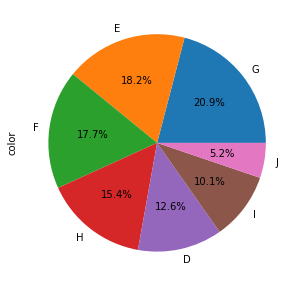

In [ ]:
fig, ax = plt.subplots(figsize=(7,5))

df.color.value_counts().plot(kind='pie', autopct='%1.1f%%')

<AxesSubplot:>

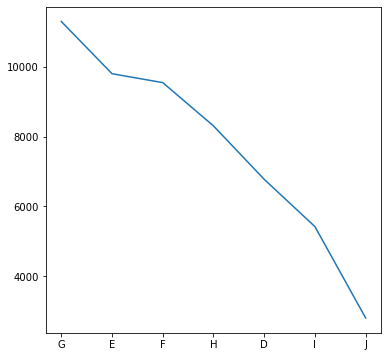

In [ ]:
fig, ax = plt.subplots(figsize=(6,6))

df.color.value_counts().plot()

In [ ]:
#df.describe(include="all").round(2).transpose()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 7.0+ MB


In [ ]:
df.select_dtypes(include='int64')  #int64 (numerique entier) float64(numerique reels) object(qualitatives)


,price
1,326
2,326
3,327
4,334
5,335
...,...
53936,2757
53937,2757
53938,2757
53939,2757


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 7.0+ MB


In [ ]:
df.head(2)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31


In [ ]:
df.rename(columns={'table':'opp_pointe'})


,carat,cut,color,clarity,depth,opp_pointe,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [ ]:
#%whos

## Get data mysql database

In [ ]:
#https://medium.com/analytics-vidhya/importing-data-from-a-mysql-database-into-pandas-data-frame-a06e392d27d7
#pip install mysql-connector-python
import mysql.connector as connection

In [ ]:
mydb = connection.connect(host="127.0.0.1", 
                          database = 'sakila',
                          user="root", 
                          passwd="newALI2020",
                          use_pure=True)

In [ ]:
mycursor = mydb.cursor()
  
mycursor.execute("Show tables;")
  
myresult = mycursor.fetchall()

In [ ]:
myresult

[('actor',),
 ('actor_info',),
 ('address',),
 ('category',),
 ('city',),
 ('country',),
 ('customer',),
 ('customer_list',),
 ('dat1',),
 ('film',),
 ('film_actor',),
 ('film_category',),
 ('film_list',),
 ('film_text',),
 ('inventory',),
 ('language',),
 ('nicer_but_slower_film_list',),
 ('payment',),
 ('rental',),
 ('sales_by_film_category',),
 ('sales_by_store',),
 ('staff',),
 ('staff_list',),
 ('store',)]

In [ ]:
query = "Select * from customer;"
result_dataFrame = pd.read_sql(query,mydb)

In [ ]:
result_dataFrame.head()

,customer_id,store_id,first_name,last_name,email,address_id,active,create_date,last_update
0,1,1,MARY,SMITH,MARY.SMITH@sakilacustomer.org,5,1,2006-02-14 22:04:36,2006-02-15 04:57:20
1,2,1,PATRICIA,JOHNSON,PATRICIA.JOHNSON@sakilacustomer.org,6,1,2006-02-14 22:04:36,2006-02-15 04:57:20
2,3,1,LINDA,WILLIAMS,LINDA.WILLIAMS@sakilacustomer.org,7,1,2006-02-14 22:04:36,2006-02-15 04:57:20
3,4,2,BARBARA,JONES,BARBARA.JONES@sakilacustomer.org,8,1,2006-02-14 22:04:36,2006-02-15 04:57:20
4,5,1,ELIZABETH,BROWN,ELIZABETH.BROWN@sakilacustomer.org,9,1,2006-02-14 22:04:36,2006-02-15 04:57:20


In [ ]:
result_dataFrame.describe()

,customer_id,store_id,address_id,active
count,599.000000,599.000000,599.000000,599.000000
mean,300.000000,1.455760,304.724541,0.974958
std,173.060683,0.498455,173.698609,0.156382
min,1.000000,1.000000,5.000000,0.000000
25%,150.500000,1.000000,154.500000,1.000000
50%,300.000000,1.000000,305.000000,1.000000
75%,449.500000,2.000000,454.500000,1.000000
max,599.000000,2.000000,605.000000,1.000000


In [ ]:
mydb.close()

# Get data from Url

In [ ]:

# Webpage url       
url1="https://raw.githubusercontent.com/mwaskom/seaborn-data/master/diamonds.csv"
df_url = pd.read_csv(url1)
df_url.head(5)


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


## Pandas web scraping  (RGPD?)

In [ ]:
# Webpage url       
url2 = 'https://forge.scilab.org/index.php/p/rdataset/source/tree/master/csv/ggplot2/diamonds.csv'

# Extract tables
dfs = pd.read_html(url2)

df_ur2 = dfs[0]

df_ur2.head(5)

,0,1
0,1,""""",""carat"",""cut"",""color"",""clarity"",""depth"",""ta..."
1,2,"""1"",0.23,""Ideal"",""E"",""SI2"",61.5,55,326,3.95,3...."
2,3,"""2"",0.21,""Premium"",""E"",""SI1"",59.8,61,326,3.89,..."
3,4,"""3"",0.23,""Good"",""E"",""VS1"",56.9,65,327,4.05,4.0..."
4,5,"""4"",0.29,""Premium"",""I"",""VS2"",62.4,58,334,4.2,4..."


In [ ]:
df_ur2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53941 entries, 0 to 53940
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       53941 non-null  int64 
 1   1       53941 non-null  object
dtypes: int64(1), object(1)
memory usage: 843.0+ KB


In [ ]:
#ESSAYER AVEC https://www.insee.fr/fr/statistiques/2122307

In [ ]:
#beautifulsoup pour de meilleurs scraping

## Echantillon

In [ ]:
df.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [ ]:
df.sample(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
22479,1.51,Ideal,H,SI1,62.8,55.0,10502,7.32,7.29,4.59
30897,0.41,Ideal,D,SI1,61.7,56.0,744,4.77,4.80,2.95
19711,1.21,Ideal,H,VVS1,62.8,55.0,8286,6.78,6.82,4.27
10190,1.06,Premium,E,SI2,60.5,60.0,4737,6.67,6.61,4.02
13018,1.20,Very Good,I,SI1,60.0,60.0,5408,6.81,6.89,4.11


In [ ]:
df.sample(frac=0.01)

,carat,cut,color,clarity,depth,table,price,x,y,z
32258,0.36,Very Good,E,VS2,62.1,59.0,789,4.55,4.59,2.84
53685,0.81,Very Good,I,VS2,64.0,60.0,2714,5.84,5.88,3.75
25178,1.74,Ideal,H,VS2,61.5,55.0,13761,7.79,7.73,4.77
7016,0.92,Good,D,SI1,63.6,57.0,4158,6.09,6.14,3.89
41778,0.59,Very Good,F,SI2,58.6,59.0,1247,5.53,5.57,3.25
...,...,...,...,...,...,...,...,...,...,...
9838,1.12,Very Good,H,SI1,63.1,56.0,4673,6.62,6.59,4.17
791,0.66,Premium,D,VS1,61.0,58.0,2861,5.67,5.57,3.43
48387,0.50,Premium,G,VVS1,61.0,60.0,1966,5.08,5.12,3.11
10467,1.10,Very Good,E,SI1,61.3,58.0,4791,6.64,6.71,4.09


## Explorer les données

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 53940 entries, 1 to 53940
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 7.0+ MB


In [ ]:
df.price.describe()

count    53940.000000
mean      3932.799722
std       3989.439738
min        326.000000
25%        950.000000
50%       2401.000000
75%       5324.250000
max      18823.000000
Name: price, dtype: float64

In [ ]:
df.query('price >= 12006') #sql FILTRER


,carat,cut,color,clarity,depth,table,price,x,y,z
23900,1.31,Ideal,G,VS1,61.6,57.0,12008,6.99,7.04,4.32
23901,1.50,Ideal,G,SI1,61.0,57.0,12009,7.38,7.41,4.51
23902,1.75,Very Good,D,SI2,60.7,57.0,12012,7.78,7.83,4.74
23903,1.52,Premium,H,VVS2,63.0,60.0,12013,7.30,7.25,4.58
23904,1.50,Very Good,G,VS2,60.5,57.0,12014,7.39,7.43,4.48
...,...,...,...,...,...,...,...,...,...,...
27746,2.00,Very Good,H,SI1,62.8,57.0,18803,7.95,8.00,5.01
27747,2.07,Ideal,G,SI2,62.5,55.0,18804,8.20,8.13,5.11
27748,1.51,Ideal,G,IF,61.7,55.0,18806,7.37,7.41,4.56
27749,2.00,Very Good,G,SI1,63.5,56.0,18818,7.90,7.97,5.04


In [ ]:
df.query('price <= 350 and price >= 326' )


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,336,3.94,3.96,2.48
7,0.24,Very Good,I,VVS1,62.3,57.0,336,3.95,3.98,2.47
8,0.26,Very Good,H,SI1,61.9,55.0,337,4.07,4.11,2.53
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
10,0.23,Very Good,H,VS1,59.4,61.0,338,4.00,4.05,2.39


In [ ]:
df.query('price <= 350 and color == "E"' )


,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
9,0.22,Fair,E,VS2,65.1,61.0,337,3.87,3.78,2.49
15,0.20,Premium,E,SI2,60.2,62.0,345,3.79,3.75,2.27
16,0.32,Premium,E,I1,60.9,58.0,345,4.38,4.42,2.68


In [ ]:
df.query('price <= 350 and color == "E"' ).describe()


,carat,depth,table,price,x,y,z
count,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.00000
mean,0.235000,60.733333,60.333333,334.333333,3.988333,3.973333,2.41500
std,0.043243,2.665833,3.444803,9.244818,0.210563,0.250573,0.15437
min,0.200000,56.900000,55.000000,326.000000,3.790000,3.750000,2.27000
25%,0.212500,59.900000,58.750000,326.250000,3.875000,3.795000,2.31000
50%,0.225000,60.550000,61.000000,332.000000,3.920000,3.910000,2.37000
75%,0.230000,61.350000,61.750000,343.000000,4.025000,4.047500,2.47500
max,0.320000,65.100000,65.000000,345.000000,4.380000,4.420000,2.68000


In [ ]:
df.nunique()


carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
x            554
y            552
z            375
dtype: int64

In [ ]:
#mettre les prix en euros
df.price=df.price*0.85

In [ ]:
df.price.describe()

count    53940.000000
mean      3342.879764
std       3391.023777
min        277.100000
25%        807.500000
50%       2040.850000
75%       4525.612500
max      15999.550000
Name: price, dtype: float64

In [ ]:
#df['carat'].where(df['carat'] > 2 , 0)


In [ ]:
df['cut'].value_counts(normalize=True)*100

Ideal        39.953652
Premium      25.567297
Very Good    22.398962
Good          9.095291
Fair          2.984798
Name: cut, dtype: float64

<AxesSubplot:ylabel='cut'>

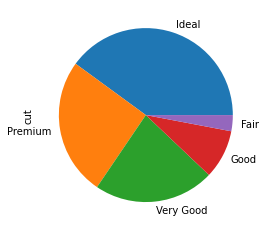

In [ ]:
df.groupby('cut').mean()#["price"]

,carat,depth,table,price,x,y,z
cut,,,,,,,
Fair,1.046137,64.041677,59.053789,3704.944099,6.246894,6.182652,3.982770
Good,0.849185,62.365879,58.694639,3339.534784,5.838785,5.850744,3.639507
Ideal,0.702837,61.709401,55.951668,2938.910675,5.507451,5.520080,3.401448
Premium,0.891955,61.264673,58.746095,3896.619049,5.973887,5.944879,3.647124
Very Good,0.806381,61.818275,57.956150,3384.495907,5.740696,5.770026,3.559801


In [ ]:
df.price.describe()

count    53940.000000
mean      3342.879764
std       3391.023777
min        277.100000
25%        807.500000
50%       2040.850000
75%       4525.612500
max      15999.550000
Name: price, dtype: float64

<AxesSubplot:xlabel='price'>

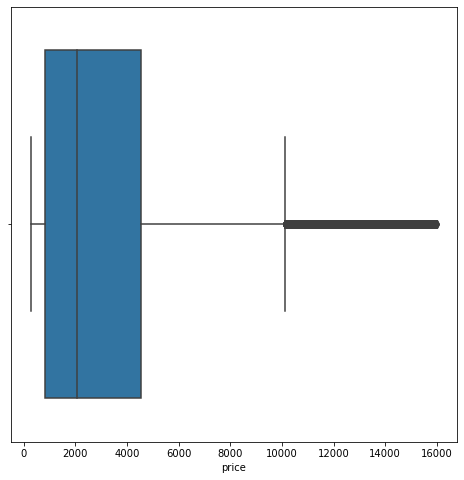

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))  #1 inch = 2,54 centimètres

sns.boxplot(x='price', data=df)


In [ ]:
df.price.describe()

count    53940.000000
mean      3342.879764
std       3391.023777
min        277.100000
25%        807.500000
50%       2040.850000
75%       4525.612500
max      15999.550000
Name: price, dtype: float64

In [ ]:
df.query('price >= 12000').describe()


,carat,depth,table,price,x,y,z
count,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000,2106.000000
mean,1.942778,61.629535,58.006695,13856.020323,7.964468,7.956235,4.896505
std,0.359073,1.491468,2.149568,1142.884805,0.555563,0.545764,0.407059
min,1.000000,56.200000,51.000000,12001.150000,0.000000,0.000000,0.000000
25%,1.680000,60.700000,57.000000,12872.612500,7.590000,7.600000,4.670000
50%,2.010000,61.800000,58.000000,13796.350000,8.070000,8.070000,4.980000
75%,2.100000,62.500000,59.000000,14795.525000,8.270000,8.270000,5.080000
max,5.010000,70.600000,69.000000,15999.550000,10.740000,10.540000,6.980000


In [ ]:
3464.000000/54000*100

6.4148148148148145

<AxesSubplot:xlabel='color', ylabel='price'>

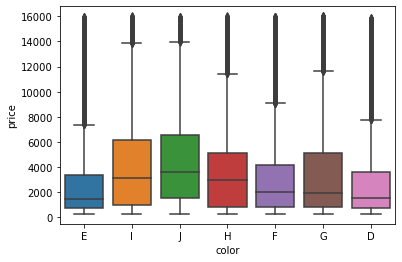

In [ ]:
sns.boxplot(x='color', y='price', data=df)

#CORR: 2 VAR QUANTITATIVES
#ANOVA    : 1 VAR QUALI, 1VAR QUANTI
#CHIQ2    : 2 VAR QUANT

C:\Users\33753\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


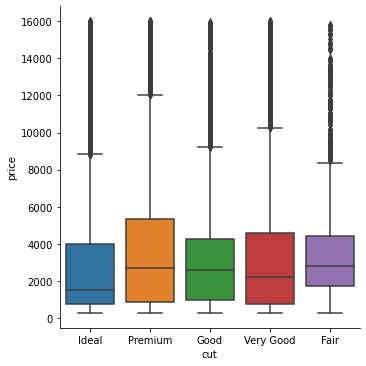

In [ ]:
sns.factorplot(x = "cut", y = "price", data = df, kind = "box")

In [ ]:
df.groupby('cut').mean()["price"]

cut
Fair         3704.944099
Good         3339.534784
Ideal        2938.910675
Premium      3896.619049
Very Good    3384.495907
Name: price, dtype: float64

array([[<AxesSubplot:title={'center':'Fair'}>,
        <AxesSubplot:title={'center':'Good'}>],
       [<AxesSubplot:title={'center':'Ideal'}>,
        <AxesSubplot:title={'center':'Premium'}>],
       [<AxesSubplot:title={'center':'Very Good'}>, <AxesSubplot:>]],
      dtype=object)

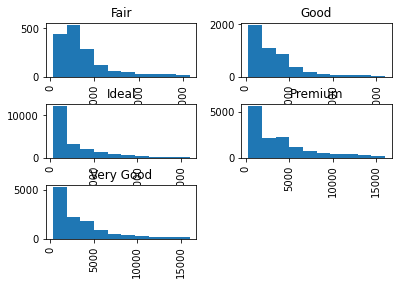

In [ ]:
df.hist(column = "price", by = "cut")

## Réaliser un test d’indépendance ANOVA

In [ ]:
df.groupby('cut').std()["price"].sort_values()

cut
Fair         3560.386612
Good         3681.589584
Ideal        3808.401172
Very Good    3935.862161
Premium      4349.204961
Name: price, dtype: float64

In [ ]:
df.groupby('cut').mean()["price"].sort_values()

cut
Ideal        3457.541970
Good         3928.864452
Very Good    3981.759891
Fair         4358.757764
Premium      4584.257704
Name: price, dtype: float64

<AxesSubplot:xlabel='cut', ylabel='price'>

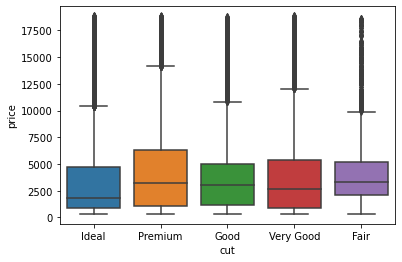

In [ ]:
sns.boxplot(x='cut', y='price', data=df)

#CORR: 2 VAR QUANTITATIVES
#ANOVA    : 1 VAR QUALI, 1VAR QUANTI
#CHIQ2    : 2 VAR QUANT

In [ ]:
#bonus
#H0: "le prix et le cut sont INDEPENDANTS"
# get ANOVA table as R like output
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Ordinary Least Squares (OLS) model
model = ols('price ~ C(cut)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

#si p-value(PR(>F))<0.05 alors il y a dependance entre les deux variables

,sum_sq,df,F,PR(>F)
C(cut),1.104175e+10,4.0,175.688717,8.428307e-150
Residual,8.474314e+11,53935.0,NaN,NaN


# Python ANOVA: Pairwise Comparisons

In [ ]:
pair_t = model.t_test_pairwise('cut')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Good-Fair,-429.893312,113.849404,-3.775982,1.595493e-04,-653.039051,-206.747574,6.380444e-04,True
Ideal-Fair,-901.215794,102.411549,-8.799943,1.408406e-18,-1101.943245,-700.488342,0.000000e+00,True
Premium-Fair,225.499940,104.395211,2.160060,3.077240e-02,20.884495,430.115385,6.059786e-02,False
Very Good-Fair,-376.997873,105.164224,-3.584849,3.375707e-04,-583.120591,-170.875155,1.012370e-03,True
Ideal-Good,-471.322481,62.703206,-7.516721,5.703359e-14,-594.221265,-348.423698,2.853273e-13,True
Premium-Good,655.393253,65.893298,9.946281,2.741680e-23,526.241863,784.544642,0.000000e+00,True
Very Good-Good,52.895439,67.104998,0.788249,4.305546e-01,-78.630893,184.421771,4.305546e-01,False
Premium-Ideal,1126.715734,43.224592,26.066544,7.339733e-149,1041.995190,1211.436278,0.000000e+00,True
Very Good-Ideal,524.217921,45.050188,11.636309,2.936462e-31,435.919193,612.516648,0.000000e+00,True
Very Good-Premium,-602.497814,49.393867,-12.197826,3.541486e-34,-699.310187,-505.685440,0.000000e+00,True


<AxesSubplot:xlabel='cut', ylabel='price'>

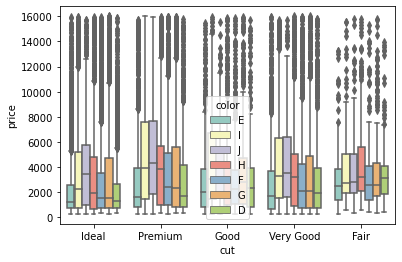

In [ ]:
sns.boxplot(x="cut", y="price", hue="color", data=df, palette="Set3") 


In [ ]:
df.sort_values(by='color', ascending=True).head()


,carat,cut,color,clarity,depth,table,price,x,y,z
53940,0.75,Ideal,D,SI2,62.2,55.0,2343.45,5.83,5.87,3.64
7818,1.00,Very Good,D,SI2,63.5,59.0,3650.75,6.35,6.32,4.02
7817,1.00,Good,D,SI2,57.8,58.0,3650.75,6.61,6.55,3.80
7816,1.00,Very Good,D,SI2,61.5,63.0,3650.75,6.32,6.27,3.87
7810,0.56,Ideal,D,IF,61.9,57.0,3649.05,5.28,5.31,3.28


In [ ]:
df.head(1)

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,277.1,3.95,3.98,2.43


In [ ]:
df_object=df.select_dtypes(include='object')
df_object.head(2)

,cut,color,clarity
1,Ideal,E,SI2
2,Premium,E,SI1


In [ ]:
all_group=""
for col in list(df_object.columns):
    all_group=all_group+"+"+str(col)
print(all_group)
var_all_group="price~"+str(all_group[1:])
var_all_group

+cut+color+clarity


'price~cut+color+clarity'

In [ ]:
# Ordinary Least Squares (OLS) model
model = ols(var_all_group, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
cut,5.574933e+09,4.0,93.715424,1.424346e-79
color,2.659499e+10,6.0,298.043761,0.000000e+00
clarity,1.999776e+10,7.0,192.094409,1.300774e-282
Residual,8.019266e+11,53922.0,NaN,NaN


In [ ]:
anova_table["dependance"]=anova_table["PR(>F)"]<0.05

In [ ]:
anova_table.sort_values("PR(>F)",ascending=True)

,sum_sq,df,F,PR(>F),dependance
color,2.659499e+10,6.0,298.043761,0.000000e+00,True
clarity,1.999776e+10,7.0,192.094409,1.300774e-282,True
cut,5.574933e+09,4.0,93.715424,1.424346e-79,True
Residual,8.019266e+11,53922.0,NaN,NaN,False


## Réaliser un test d’indépendance CHI2

C:\Users\33753\anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


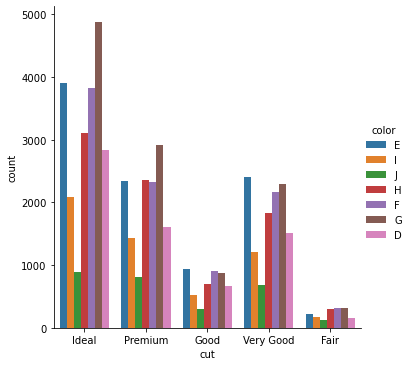

In [ ]:
sns.factorplot(x = "cut", hue = "color", data = df, kind = "count")

<AxesSubplot:xlabel='cut'>

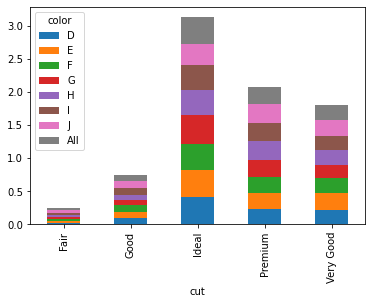

In [ ]:
t=pd.crosstab(df.cut, df.color, normalize = "columns", margins=True)
t.plot.bar(stacked=True)

In [ ]:
tab=pd.crosstab(df.cut, df.color)

In [ ]:
tab

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


In [ ]:
pd.crosstab(df.cut, df.color, normalize = "columns", margins=True).round(2)  #index

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,0.10,0.14,0.19,0.20,0.19,0.11,0.07
Good,0.13,0.19,0.19,0.18,0.14,0.11,0.06
Ideal,0.13,0.18,0.18,0.23,0.14,0.10,0.04
Premium,0.12,0.17,0.17,0.21,0.17,0.10,0.06
Very Good,0.13,0.20,0.18,0.19,0.15,0.10,0.06
All,0.13,0.18,0.18,0.21,0.15,0.10,0.05


In [ ]:
#methode1

In [ ]:
from scipy.stats import chi2_contingency 
chi_val, p_val, dof, expected =  chi2_contingency(tab)
print("chi2 val:",chi_val)
print("p value: ",p_val)
print("dependance? : ", p_val<0.05)
print("dot:",dof,) 
print("expected")
tab_expected=(pd.DataFrame(expected, columns=tab.columns, index=tab.index)).astype(int)
tab_expected

chi2 val: 310.31790052115434
p value:  1.394512091985105e-51
dependance? :  True
dot: 24
expected


color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,202,292,284,337,247,161,83
Good,616,891,867,1027,755,493,255
Ideal,2706,3914,3812,4511,3317,2166,1121
Premium,1732,2504,2439,2887,2123,1386,717
Very Good,1517,2194,2137,2529,1860,1214,628


In [ ]:
pd.crosstab(df.cut, df.color)

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,163,224,312,314,303,175,119
Good,662,933,909,871,702,522,307
Ideal,2834,3903,3826,4884,3115,2093,896
Premium,1603,2337,2331,2924,2360,1428,808
Very Good,1513,2400,2164,2299,1824,1204,678


In [ ]:
tab-tab_expected

color,D,E,F,G,H,I,J
cut,,,,,,,
Fair,-39,-68,28,-23,56,14,36
Good,46,42,42,-156,-53,29,52
Ideal,128,-11,14,373,-202,-73,-225
Premium,-129,-167,-108,37,237,42,91
Very Good,-4,206,27,-230,-36,-10,50


In [ ]:
#methode2

In [ ]:
sqtab = sm.stats.SquareTable(tab)
sqtab.summary()

,Statistic,P-value,DF
Symmetry,53880.276,0.000,78
Homogeneity,53880.100,0.000,12


In [ ]:
sqtab = sm.stats.SquareTable.from_data(df[['cut', 'color']])
sqtab.summary()

,Statistic,P-value,DF
Symmetry,53887.558,0.000,66
Homogeneity,53887.554,0.000,11


In [ ]:
#methode3

In [ ]:
#https://www.statsmodels.org/stable/contingency_tables.html
x,y=df.cut, df.clarity
tab = pd.crosstab(x,y)
import statsmodels.api as sm
table = sm.stats.Table(tab)
rslt = table.test_nominal_association()
print(rslt.pvalue)

0.0


## LOI NORMALE DISTRIBUTION

In [ ]:
df_num=df.select_dtypes(exclude='object')
df_num.head(2)

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31


In [ ]:
feature_num_col=list(df_num.columns)

In [ ]:
scipy.stats.normaltest(df.price)

NormaltestResult(statistic=15096.649759774145, pvalue=0.0)

In [ ]:
scipy.stats.shapiro(df.price)

ShapiroResult(statistic=0.7981084585189819, pvalue=0.0)

In [ ]:
import scipy
#scipy.stats.normaltest(df.total_bill)
#scipy.stats.shapiro(df.total_bill)
# null hypothesis: x comes from a normal distribution
def normal_test(col):
    alpha = 0.05
    k2, p = scipy.stats.normaltest(df[col],nan_policy="omit")
    if p < alpha:
        return "The null hypothesis can be rejected","p_value=",p
    else :
        return "The null hypothesis can be rejected","p_value=",p

In [ ]:
for col in feature_num_col:
    print(f'{col :-<30} {normal_test(col)}')

carat------------------------- ('The null hypothesis can be rejected', 'p_value=', 0.0)
depth------------------------- ('The null hypothesis can be rejected', 'p_value=', 0.0)
table------------------------- ('The null hypothesis can be rejected', 'p_value=', 0.0)
price------------------------- ('The null hypothesis can be rejected', 'p_value=', 0.0)
x----------------------------- ('The null hypothesis can be rejected', 'p_value=', 0.0)
y----------------------------- ('The null hypothesis can be rejected', 'p_value=', 0.0)
z----------------------------- ('The null hypothesis can be rejected', 'p_value=', 0.0)


In [ ]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

In [ ]:
a=(calculate_pvalues(df))
a

,carat,depth,table,price,x,y,z
carat,0.0,0.0,0.0,0.0,0.0,0.0,0.0
depth,0.0,0.0,0.0,0.0134,0.0,0.0,0.0
table,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,0.0134,0.0,0.0,0.0,0.0,0.0
x,0.0,0.0,0.0,0.0,0.0,0.0,0.0
y,0.0,0.0,0.0,0.0,0.0,0.0,0.0
z,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
pvals = pd.DataFrame([[pearsonr(df_num[c], df_num[y])[1] for y in df_num.columns] for c in df_num.columns],
                     columns=df_num.columns, index=df_num.columns)
pvals.round(4)

,carat,depth,table,price,x,y,z
carat,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0
depth,0.0,0.0000,0.0,0.0134,0.0,0.0,0.0
table,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0
price,0.0,0.0134,0.0,0.0000,0.0,0.0,0.0
x,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0
y,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0
z,0.0,0.0000,0.0,0.0000,0.0,0.0,0.0


<AxesSubplot:>

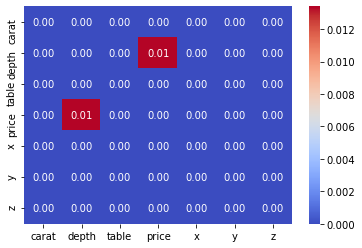

In [ ]:
sns.heatmap(pvals,annot=True, fmt=".2f",cmap='coolwarm')

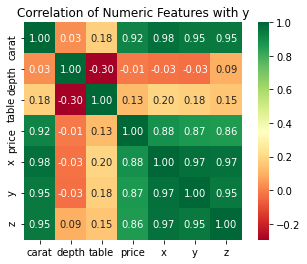

In [ ]:
#Heatmap of correlations
from matplotlib import rcParams
plt.title('Correlation of Numeric Features with y')

rcParams['figure.figsize'] = 15, 15
p=sns.heatmap(df.corr(), annot=True,cmap='RdYlGn',square=True, fmt='.2f')

<AxesSubplot:>

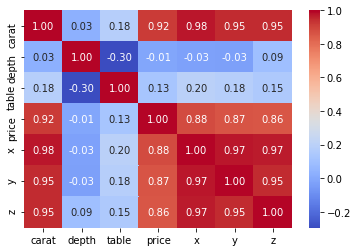

In [ ]:
sns.heatmap(df.corr(),annot=True, fmt=".2f",cmap='coolwarm')

## Visualisation

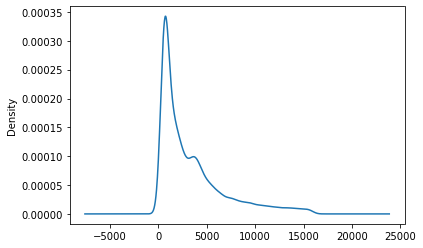

In [ ]:
df.price.plot(kind='density')
plt.show()

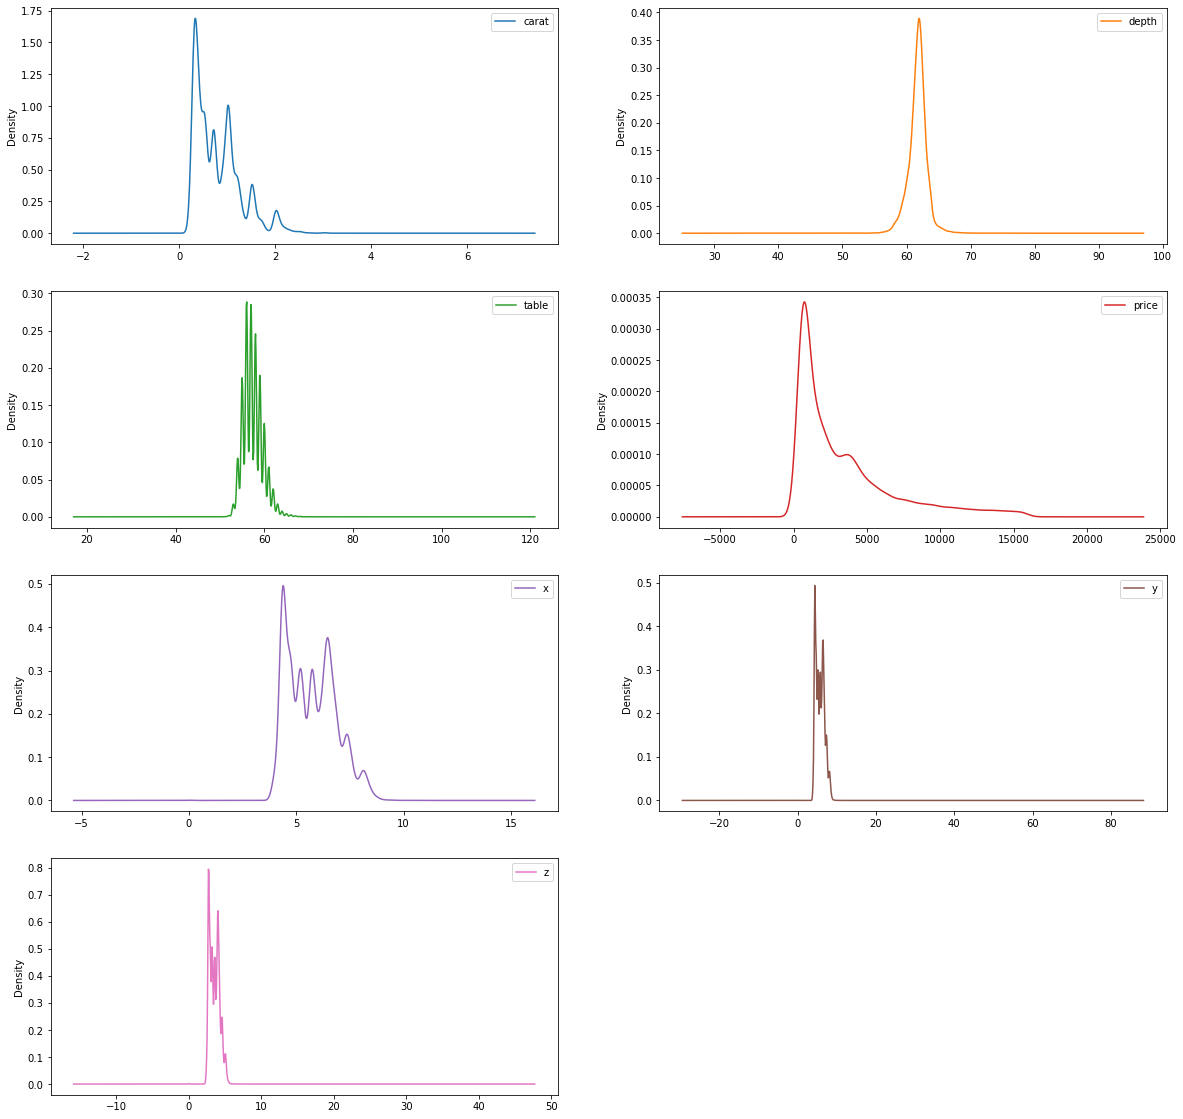

In [ ]:
df.plot(kind='density', subplots=True, layout=(4,2), sharex=False, sharey=False, figsize=(20,20))
plt.show()

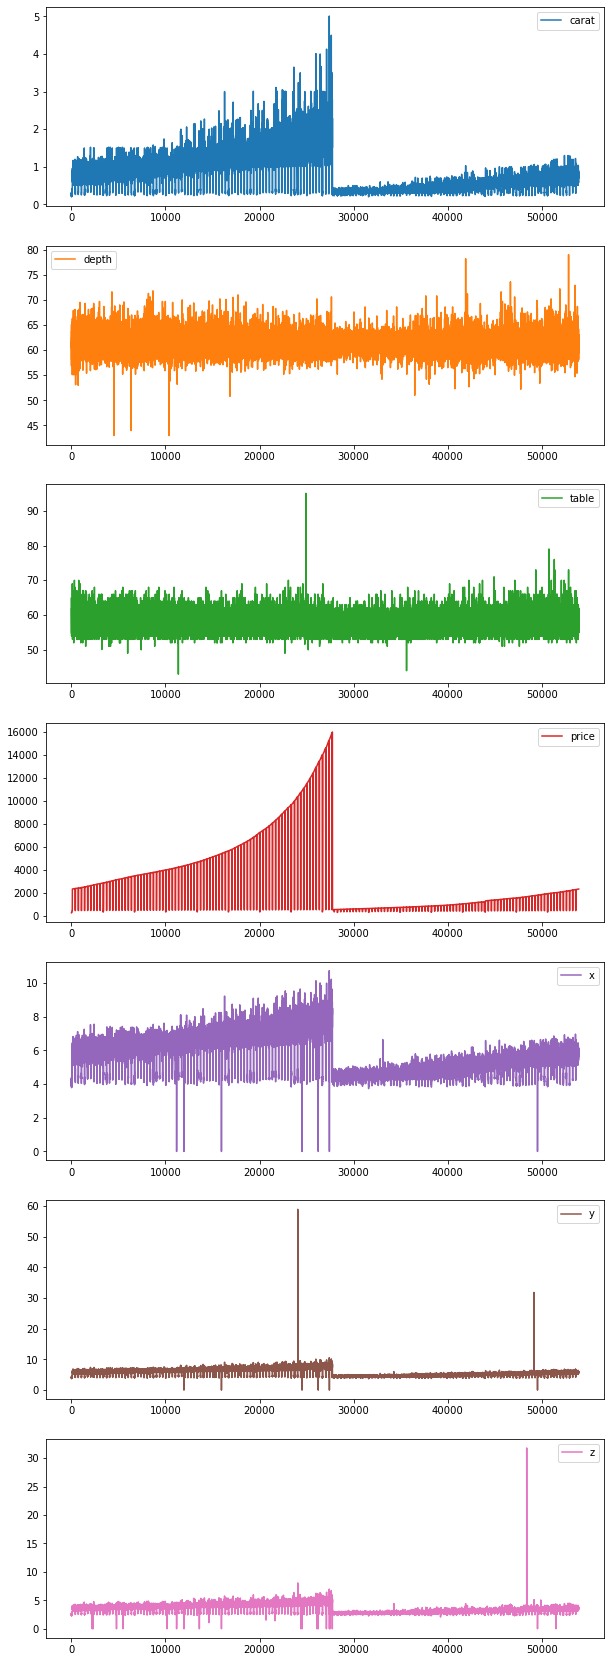

In [ ]:
df.plot(subplots=True, layout=(7,1), sharex=False, sharey=False, figsize=(10,30))
plt.show()

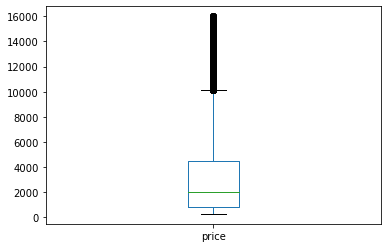

In [ ]:
df.price.plot(kind='box')   #permet de voir les données aberrantes
plt.show()

In [ ]:
df_abr=df.query('price >= 11000')
df_abr.describe()


,carat,depth,table,price,x,y,z
count,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000,2805.000000
mean,1.897258,61.655579,57.987308,13263.836667,7.901604,7.892499,4.861647
std,0.357400,1.466541,2.243376,1434.566872,0.548255,0.537571,0.386003
min,1.000000,56.200000,50.000000,11001.550000,0.000000,0.000000,0.000000
25%,1.570000,60.800000,57.000000,12006.250000,7.490000,7.490000,4.610000
50%,2.010000,61.800000,58.000000,13173.300000,8.030000,8.010000,4.940000
75%,2.080000,62.500000,59.000000,14473.800000,8.240000,8.220000,5.070000
max,5.010000,70.600000,95.000000,15999.550000,10.740000,10.540000,6.980000


In [ ]:
#df_abr_price=df.price.query('price <= 12000')


In [ ]:

df_abr.shape[0]/df.shape[0]*100
# 5% des données sont aberrantes pour les prix

5.2002224694104555

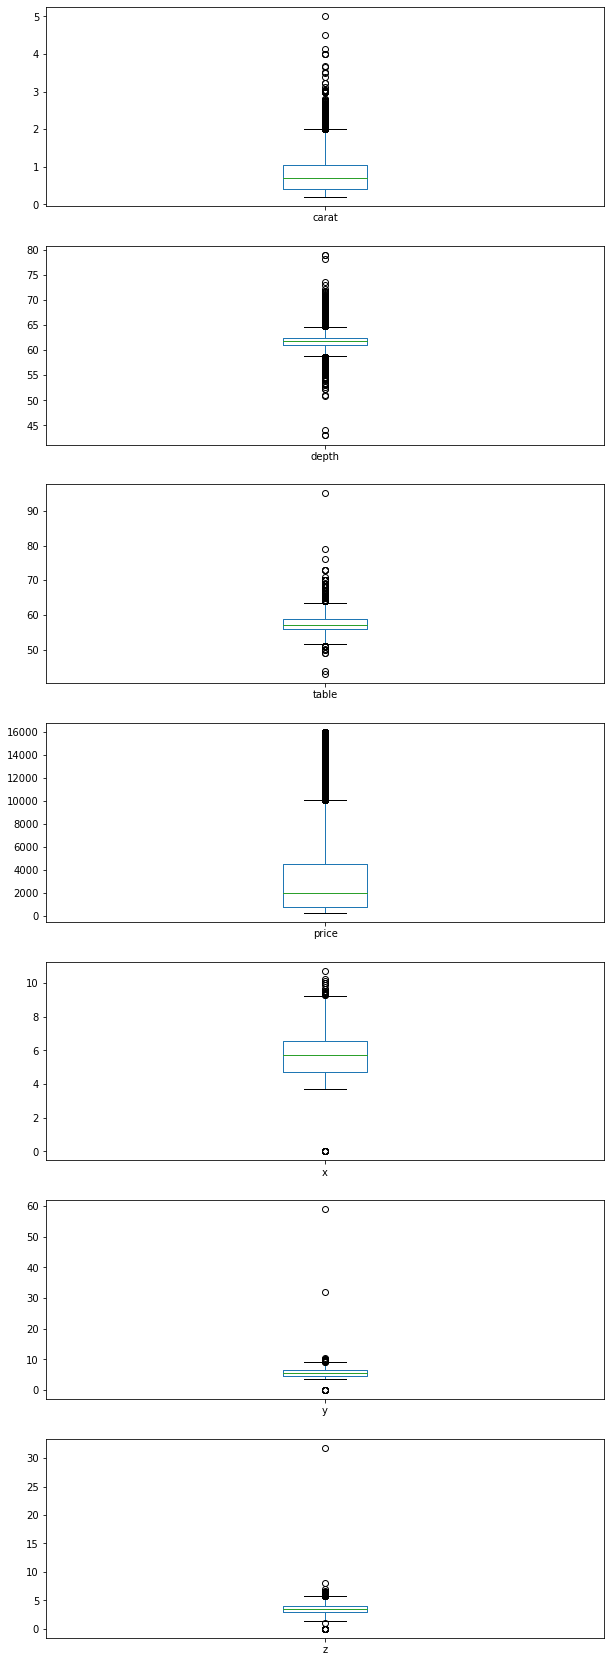

In [ ]:
df.plot(kind='box', subplots=True, layout=(7,1), sharex=False, sharey=False, figsize=(10,30))
plt.show()

<AxesSubplot:>

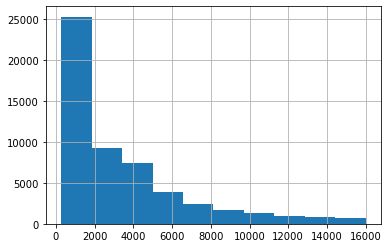

In [ ]:
df.price.hist()

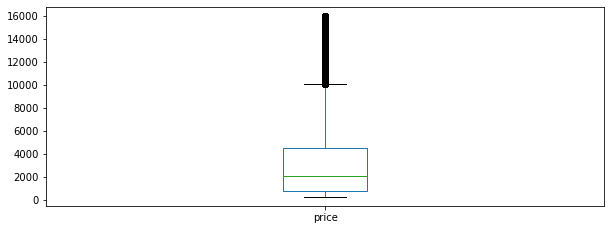

In [ ]:
df.price.plot(kind='box', subplots=True, layout=(7,1), sharex=False, sharey=False, figsize=(10,30))
plt.show()

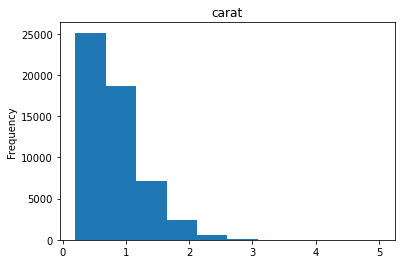

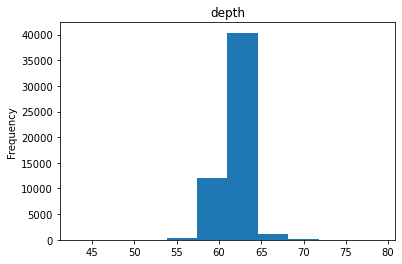

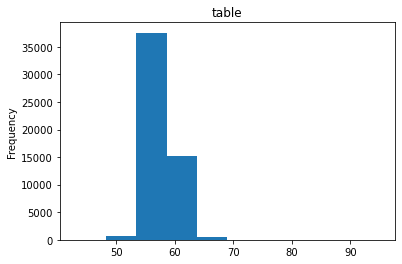

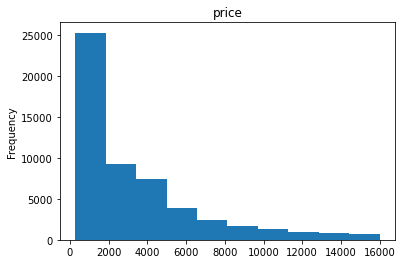

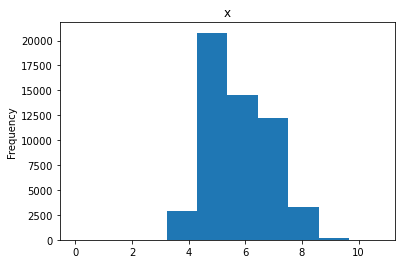

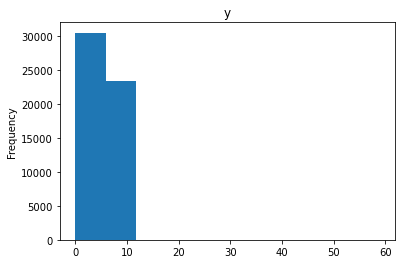

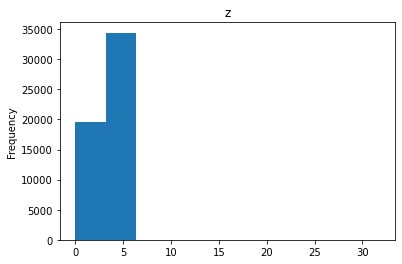

In [ ]:
for col in col_num:
    df[col].plot(kind='hist',title=col)
    plt.show()

## GESTION DES OUTLIERS

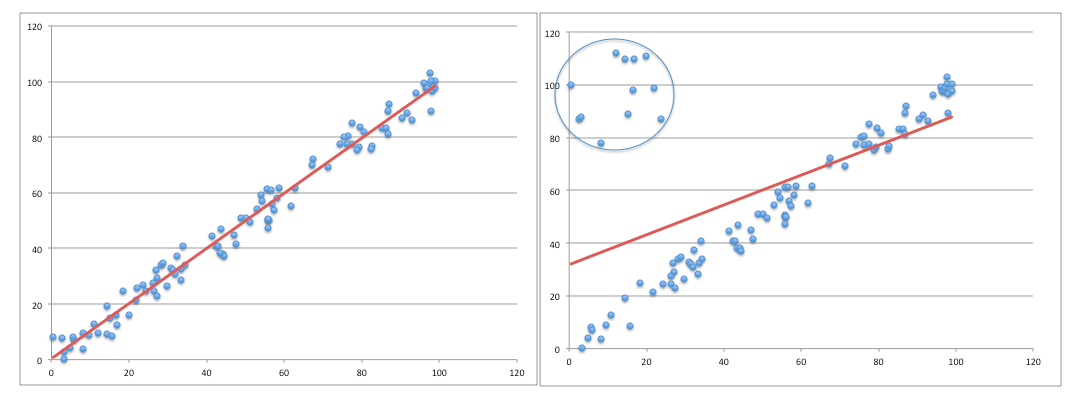

In [ ]:
from IPython.display import Image
Image(filename='outliers.jpg')

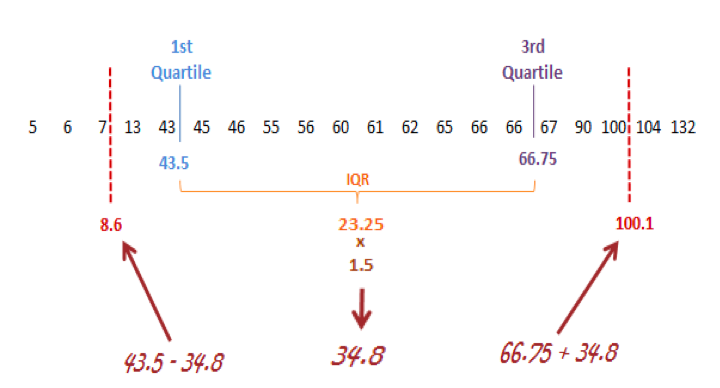

In [ ]:
from IPython.display import Image
Image(filename='tukeyiqr.jpg')
# Imagine taken from: 
# http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/

In [ ]:
df.price.describe()

count    53940.000000
mean      3342.879764
std       3391.023777
min        277.100000
25%        807.500000
50%       2040.850000
75%       4525.612500
max      15999.550000
Name: price, dtype: float64

In [ ]:
4400*1.5+5324

11924.0

<AxesSubplot:xlabel='price'>

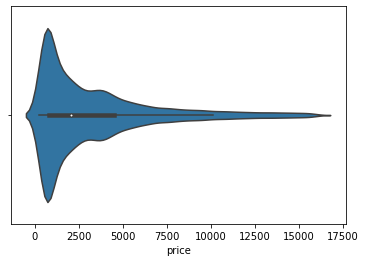

In [ ]:
sns.violinplot(x = "price", data = df)


In [ ]:
def find_outliers_tukey(x):
    q1 = np.percentile(x, 25)
    q3 = np.percentile(x, 75)
    iqr = q3-q1 
    floor = q1 - 1.5*iqr
    ceiling = q3 + 1.5*iqr
    outlier_indices = list(x.index[(x < floor)|(x > ceiling)])
    outlier_values = list(x[outlier_indices])

    return outlier_indices, outlier_values

In [ ]:
df_num.head(2)

,carat,depth,table,price,x,y,z
1,0.23,61.5,55.0,326,3.95,3.98,2.43
2,0.21,59.8,61.0,326,3.89,3.84,2.31


In [ ]:
somme=0
for colonne in col_num:
    
    tukey_indices, tukey_values = find_outliers_tukey(df[colonne])
    somme=somme+len(np.sort(tukey_values))
    print(colonne, len(np.sort(tukey_values)))
    print(np.sort(tukey_values)[0:5])
print("nb outliers",somme)

carat 1889
[2.01 2.01 2.01 2.01 2.01]
depth 2545
[43.  43.  44.  50.8 51. ]
table 605
[43. 44. 49. 49. 50.]
price 3540
[10103.1 10103.1 10104.8 10104.8 10104.8]
x 32
[0. 0. 0. 0. 0.]
y 29
[0. 0. 0. 0. 0.]
z 49
[0. 0. 0. 0. 0.]
nb outliers 8689


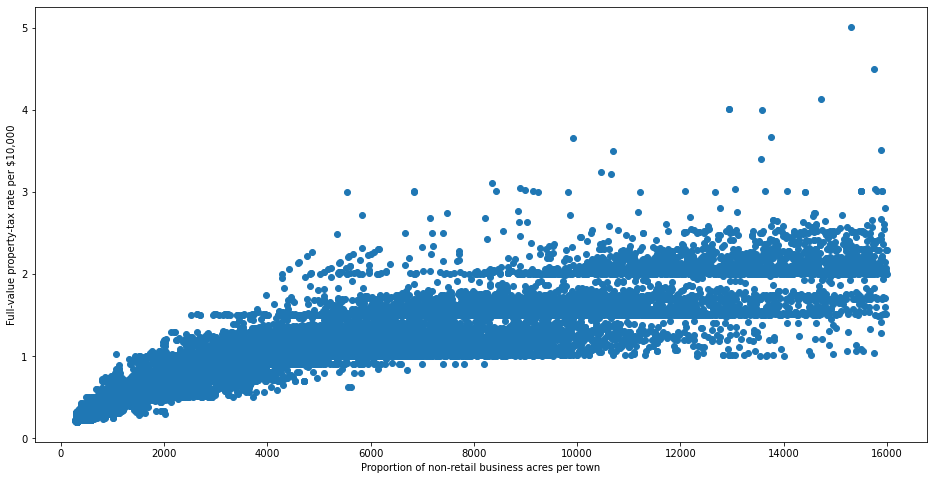

In [ ]:
fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['price'], df['carat'])
ax.set_xlabel('Proportion of non-retail business acres per town')
ax.set_ylabel('Full-value property-tax rate per $10,000')
plt.show()

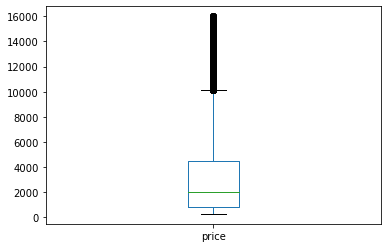

In [ ]:
df.price.plot(kind='box')   #permet de voir les données aberrantes
plt.show()

In [ ]:
df.shape

(53940, 10)

In [ ]:
df_num=df.select_dtypes(exclude='object')   #object=variables qualitatives
Q1 = df_num.quantile(0.25)  #
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1 #ECART ITERQUARTILES
df_without_outiers = df_num[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]

In [ ]:
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1

#checking 
verif= pd.DataFrame({'IQR':IQR, 
                     'Q1-1.5IQR':Q1 - 1.5 * IQR,
                     'Q3+1.5*IQR':Q3 + 1.5 * IQR })
verif.head(10)


,IQR,Q1-1.5IQR,Q3+1.5*IQR
carat,0.6400,-0.56000,2.00000
depth,1.5000,58.75000,64.75000
table,3.0000,51.50000,63.50000
price,3718.1125,-4769.66875,10102.78125
x,1.8300,1.96500,9.28500
y,1.8200,1.99000,9.27000
z,1.1300,1.21500,5.73500


In [ ]:
(df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))

,carat,depth,table,price,x,y,z
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,True,True,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
53936,False,False,False,False,False,False,False
53937,False,False,False,False,False,False,False
53938,False,False,False,False,False,False,False
53939,False,False,False,False,False,False,False


In [ ]:
df_outiers = df_num[((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
df_outiers.shape

(6416, 7)

In [ ]:
df_without_outiers = df_num[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
df_without_outiers.shape

(47524, 7)

In [ ]:
100-df_without_outiers.shape[0]/df.shape[0]*100  #pourcentage de outliers

11.894697812384123

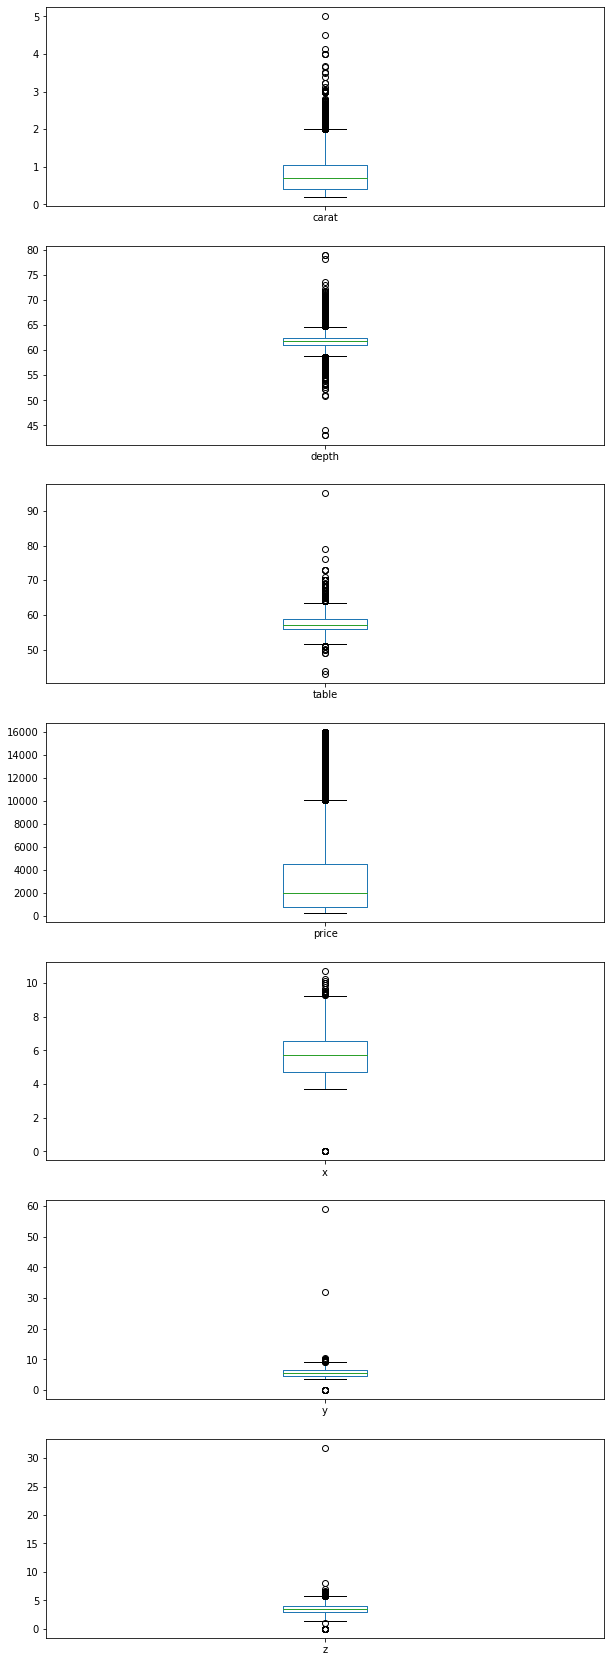

In [ ]:
df_num.plot(kind='box', subplots=True, layout=(7,1), sharex=False, sharey=False, figsize=(10,30))
plt.show()

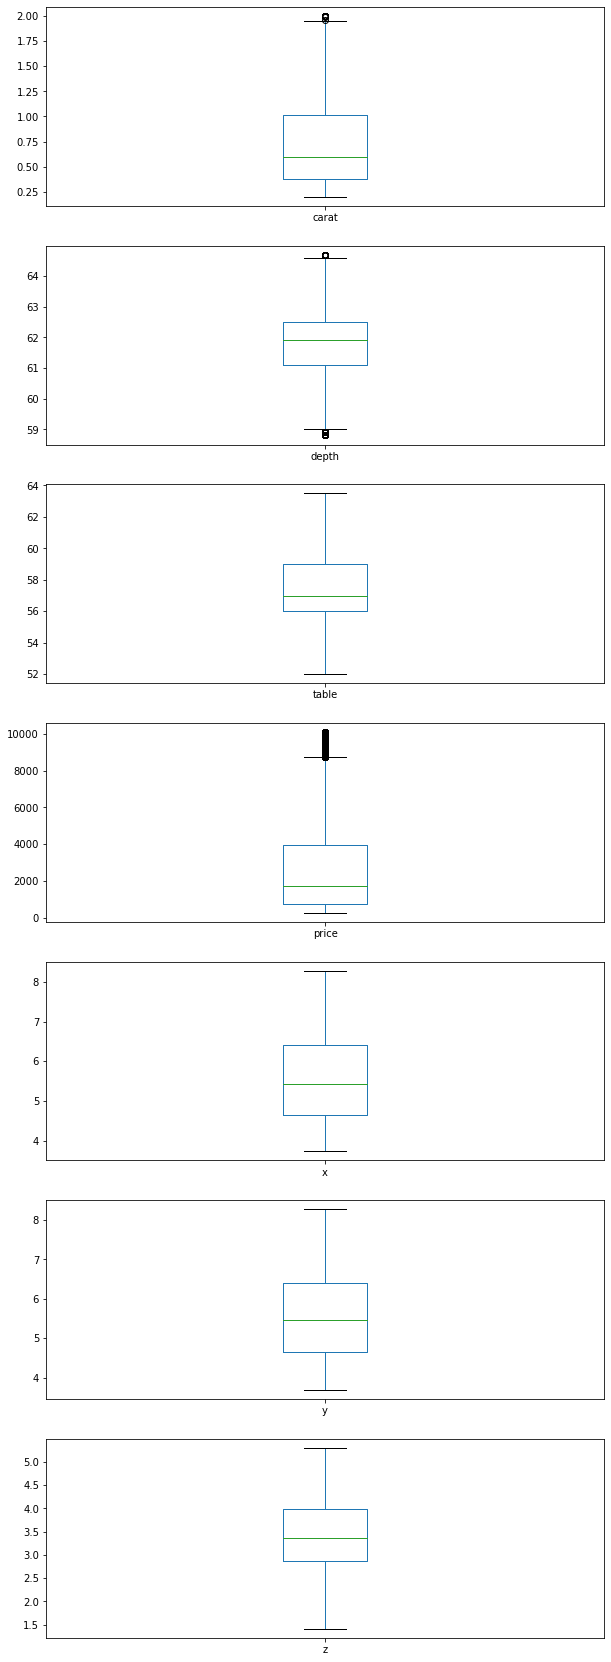

In [ ]:
df_without_outiers.plot(kind='box', subplots=True, layout=(7,1), sharex=False, sharey=False, figsize=(10,30))
plt.show()

# GESTION DES DONNEES MANQUANTES

In [ ]:
df.cut.value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [ ]:
df.cut.value_counts(normalize=True)

Ideal        0.399537
Premium      0.255673
Very Good    0.223990
Good         0.090953
Fair         0.029848
Name: cut, dtype: float64

<AxesSubplot:ylabel='cut'>

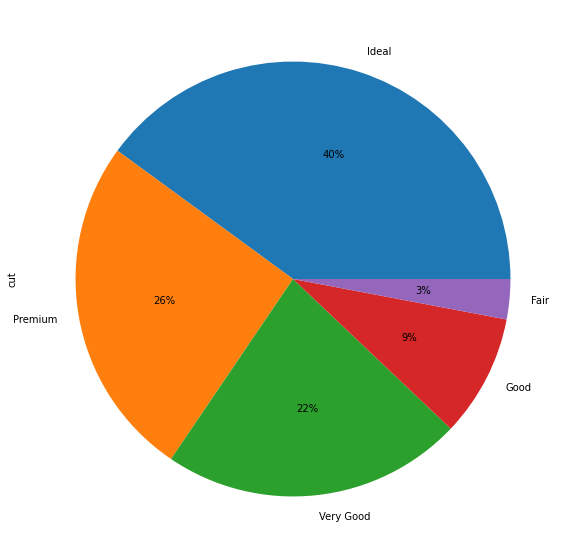

In [ ]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 10
df.cut.value_counts().plot(kind='pie', autopct='%1.0f%%')

C:\Users\33753\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

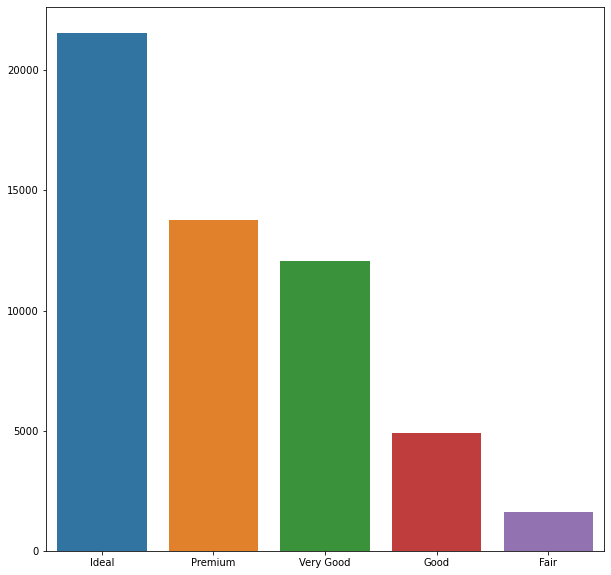

In [ ]:
df_count = df['cut'].value_counts()
sns.barplot(df_count.index, df_count.values)

In [ ]:
df.groupby('cut')['price'].mean().sort_values(ascending=False)

cut
Premium      3896.619049
Fair         3704.944099
Very Good    3384.495907
Good         3339.534784
Ideal        2938.910675
Name: price, dtype: float64

## Handling missing data

<AxesSubplot:>

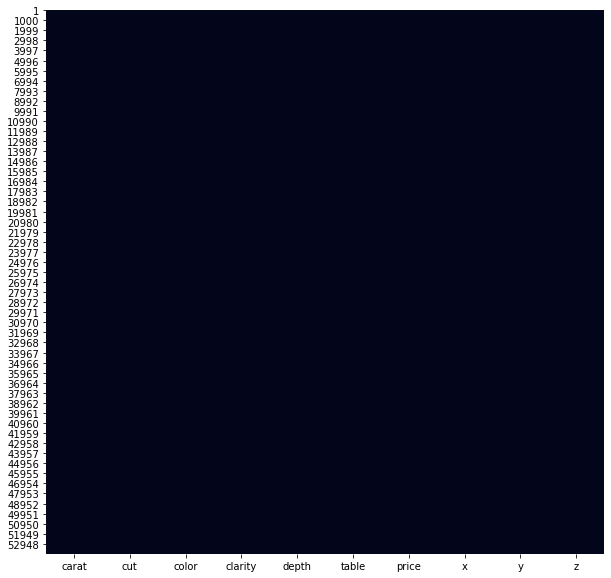

In [ ]:
sns.heatmap(df.isna(), cbar=False)


In [ ]:


# Check for missing data
df.isnull().sum() # gives number of null value by column
# How much of your data is missing?
df.isnull().sum().sort_values(ascending=False)




z          0
y          0
x          0
price      0
table      0
depth      0
clarity    0
color      0
cut        0
carat      0
dtype: int64

In [ ]:
pd.DataFrame({'count_missing':df.isna().sum(), 'missing_rate':df.isna().sum()/df.shape[0]*100})

,count_missing,missing_rate
carat,0,0.0
cut,0,0.0
color,0,0.0
clarity,0,0.0
depth,0,0.0
table,0,0.0
price,0,0.0
x,0,0.0
y,0,0.0
z,0,0.0


In [ ]:
#df = df.dropna() # drop NaN values
#df.fillna(value=5)

In [ ]:
#df.fillna(value=5)

In [ ]:
#trop de données manquantes
missing_rate = df.isna().sum()/df.shape[0]
missing_rate
df = df[df.columns[(missing_rate < 0.3)]]
print(df.columns,df.shape)


carat      0.0
cut        0.0
color      0.0
clarity    0.0
depth      0.0
table      0.0
price      0.0
x          0.0
y          0.0
z          0.0
dtype: float64

In [ ]:

df = df[df.columns[(missing_rate < 0.3)]]
print(df.columns,df.shape)

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object') (53940, 10)


In [ ]:
#row 
Missing_row=[0]*len(df.index)

print("***Count NaN in each row of a DataFrame***")
    
for i in range(len(df.index)) :
    #print("Nan in row ", i , " : " ,  df.iloc[i].isnull().sum())
    Missing_row[i]= df.iloc[i].isnull().sum()/df.shape[1]*100
Missing_row.sort()
Missing_row[0:10]

***Count NaN in each row of a DataFrame***


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [ ]:
#df["NB_missing"]=Missing
# Get names of indexes for which column Age has value 30
#indexNames = df[ df['NB_missing'] >= 10 ].index
# Delete these row indexes from dataFrame
#df.drop(indexNames , inplace=True)


In [ ]:
#Codonnées non utiles pour notre annalyse
#col_to_drop=["name","tweet_id","tweet_created"]
#df = df.drop(columns=col_to_drop)
#print(df.columns,df.shape)

In [ ]:
for col in col_object:
    df[col] = df[col].replace(np.NaN, 'Unknown') 

## Correlation entre variables

In [ ]:
df.corr()*100   #df.corr(method='pearson')

,carat,depth,table,price,x,y,z
carat,100.000000,2.822431,18.161755,92.159130,97.509423,95.172220,95.338738
depth,2.822431,100.000000,-29.577852,-1.064740,-2.528925,-2.934067,9.492388
table,18.161755,-29.577852,100.000000,12.713390,19.534428,18.376015,15.092869
price,92.159130,-1.064740,12.713390,100.000000,88.443516,86.542090,86.124944
x,97.509423,-2.528925,19.534428,88.443516,100.000000,97.470148,97.077180
y,95.172220,-2.934067,18.376015,86.542090,97.470148,100.000000,95.200572
z,95.338738,9.492388,15.092869,86.124944,97.077180,95.200572,100.000000


<ipython-input-32-883e47a13233>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


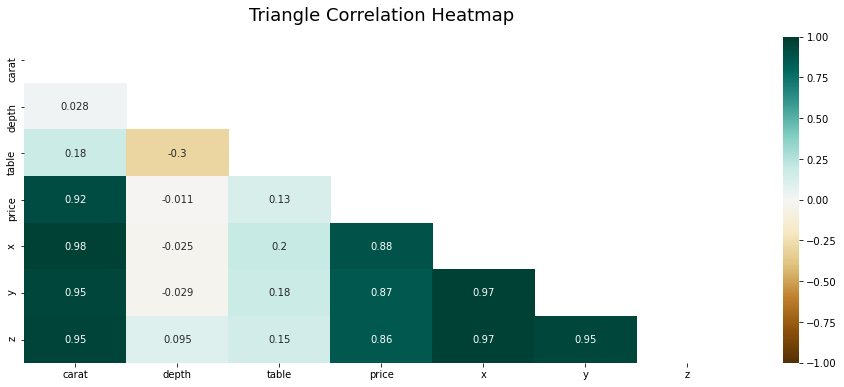

In [ ]:
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [ ]:
df.corr()["price"]*100

carat     92.159130
depth     -1.064740
table     12.713390
price    100.000000
x         88.443516
y         86.542090
z         86.124944
Name: price, dtype: float64

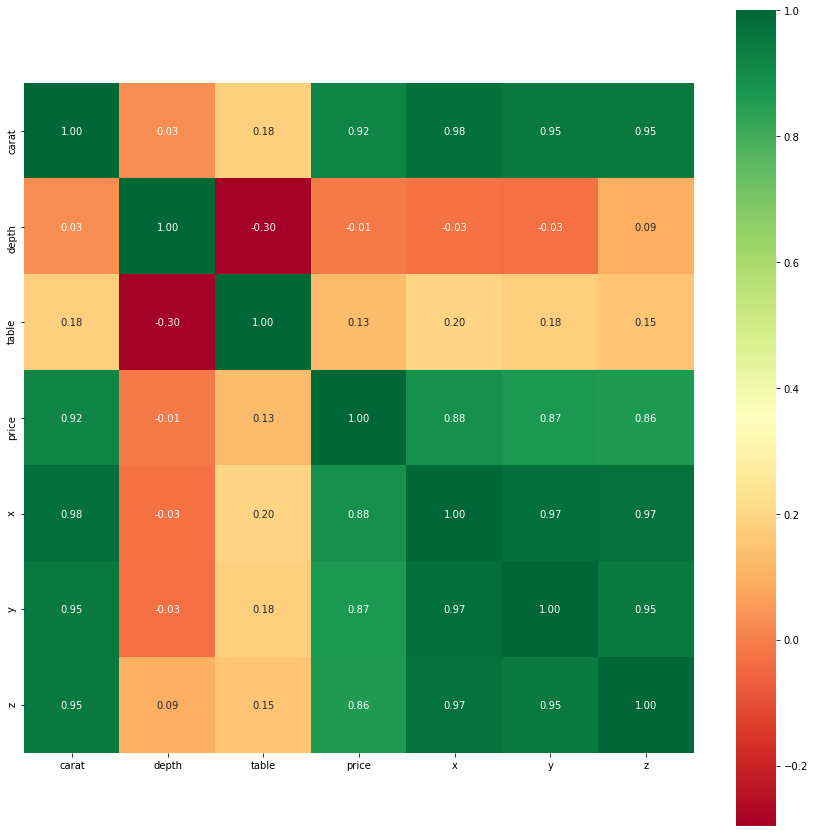

In [ ]:
import scipy
#scipy.stats.normaltest(df.total_bill)

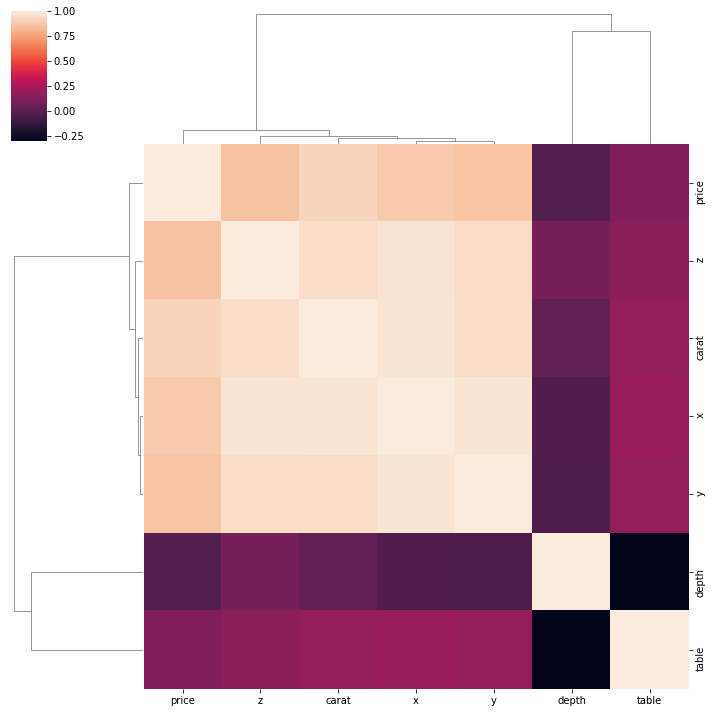

In [ ]:
sns.clustermap(df.corr())


In [ ]:
#df.replace({'A':'A_1', 'B':'B_1'})


In [ ]:
choix = ['Premium', 'Fair'] 
df [df.isin (choix)]

,carat,cut,color,clarity,depth,table,price,x,y,z
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,Premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
53936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
53939,NaN,Premium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#END POUR LA SEANCE 1

## Exploratory Data Analysis with pandas-profiling


In [ ]:
pip install pandas-profiling

#https://github.com/pandas-profiling/pandas-profiling
#Exploratory Data Analysis 
#https://www.datacorner.fr/pandas-profiling/

from pandas_profiling import ProfileReport
resultats = df.profile_report(title='Pandas Profiling Report')
resultats.to_file("report.html")



## END ANALYSIS

## MACHINE LEARNING WITH PYTHON

# Create binary target

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,277.10,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,277.10,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,277.95,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,283.90,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,284.75,4.34,4.35,2.75


In [ ]:

X= df.drop(["price"],axis=1)
y = df["price"]


In [ ]:
y.head()

1    277.10
2    277.10
3    277.95
4    283.90
5    284.75
Name: price, dtype: float64

In [ ]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,4.34,4.35,2.75


In [ ]:
categorical_cols=["cut","color","clarity"]
X_enc = pd.get_dummies(X, columns=categorical_cols)
#on utilisera la semaine prochaine, la fonction de sklearn ONEHOTENCODER
#https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

In [ ]:
X_enc.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,0.23,61.5,55.0,3.95,3.98,2.43,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,0.21,59.8,61.0,3.89,3.84,2.31,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,0.23,56.9,65.0,4.05,4.07,2.31,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0.29,62.4,58.0,4.20,4.23,2.63,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
5,0.31,63.3,58.0,4.34,4.35,2.75,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


## Prediction withs stats

In [ ]:
import statsmodels.api as sm
#https://www.statsmodels.org/stable/index.html
model = sm.OLS(y, X_enc).fit()
predictions = model.predict(X_enc) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                 2.688e+04
Date:                Sun, 02 May 2021   Prob (F-statistic):               0.00
Time:                        21:55:23   Log-Likelihood:            -4.4696e+05
No. Observations:               53940   AIC:                         8.940e+05
Df Residuals:                   53916   BIC:                         8.942e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
carat          9568.4316     41.333    231.494      0.000    9487.418    9649.445
depth           -54.2352      3.854    -14.071      0.000     -61.790     -46.681
table           -22.5030      2.475     -9.092      0.000     -27.354     -17.652
x              -857.0219     27.963    -30.648      0.000    -911.830    -802.214
y                 8.1676     16.433      0.497      0.619     -24.041      40.376
z               -42.6011     28.463     -1.497      0.134     -98.389      13.187
cut_Fair       1597.4096    152.096     10.503      0.000    1299.301    1895.519
cut_Good       2090.1983    146.041     14.312      0.000    1803.957    2376.440
cut_Ideal      2305.3847    139.435     16.534      0.000    2032.092    2578.678
cut_Premium    2245.2320    142.842     15.718      0.000    1965.260    2525.204
cut_Very Good  2215.1748    142.923     15.499      0.000    1935.044    2495.306
color_D        2195.1902    103.354     21.239      0.000    1992.615    2397.765
color_E        2017.4398    103.198     19.549      0.000    1815.170    2219.710
color_F        1963.2644    103.320     19.002      0.000    1760.757    2165.772
color_G        1785.4571    103.411     17.266      0.000    1582.771    1988.144
color_H        1361.9635    103.551     13.153      0.000    1159.003    1564.924
color_I         948.8824    103.762      9.145      0.000     745.509    1152.256
color_J         181.2019    104.359      1.736      0.083     -23.342     385.746
clarity_I1    -1935.7941     96.975    -19.962      0.000   -2125.866   -1745.722
clarity_IF     2607.5428     91.265     28.571      0.000    2428.663    2786.423
clarity_SI1    1179.8572     91.245     12.931      0.000    1001.017    1358.697
clarity_SI2     361.4043     91.214      3.962      0.000     182.624     540.184
clarity_VS1    1955.8442     90.641     21.578      0.000    1778.186    2133.502
clarity_VS2    1691.3460     90.780     18.631      0.000    1513.417    1869.275
clarity_VVS1   2320.8011     90.600     25.616      0.000    2143.225    2498.377
clarity_VVS2   2272.3979     90.616     25.077      0.000    2094.789    2450.006
==============================================================================
Omnibus:                    14433.356   Durbin-Watson:                   1.183
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           565680.446
Skew:                           0.577   Prob(JB):                         0.00
Kurtosis:                      18.823   Cond. No.                     1.16e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.88e-24. This might indicate that there are
strong multicollinearity problems or that the design ma

In [ ]:
model.params.sort_values(ascending=False)

carat            9568.431561
clarity_IF       2607.542843
clarity_VVS1     2320.801122
cut_Ideal        2305.384678
clarity_VVS2     2272.397895
cut_Premium      2245.231967
cut_Very Good    2215.174812
color_D          2195.190205
cut_Good         2090.198338
color_E          2017.439832
color_F          1963.264448
clarity_VS1      1955.844162
color_G          1785.457136
clarity_VS2      1691.345964
cut_Fair         1597.409609
color_H          1361.963531
clarity_SI1      1179.857202
color_I           948.882402
clarity_SI2       361.404284
color_J           181.201851
y                   8.167554
table             -22.502972
z                 -42.601057
depth             -54.235185
x                -857.021933
clarity_I1      -1935.794066
dtype: float64

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,277.10,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,277.10,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,277.95,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,283.90,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,284.75,4.34,4.35,2.75


## PREDICTION WITH SKLEARN

In [ ]:
import sklearn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

from sklearn.linear_model import LinearRegression

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor  #NE MARCHE PAS, why

#from sklearn.neural_network import MLPRegressor

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size=0.10, random_state=100)


# Fit model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

#score model
# Find the error rate on the training set
print('Train set score: {:.3f}'.format(model.score(X_train, y_train)))

# Find the error rate on the test set
print('Test set score: {:.3f}'.format(model.score(X_test, y_test)))


#model prediction
# Run the model and make a prediction  and look at the first prediction returned

prediction=model.predict(X_test)

#checking the performance of the model
y_verif= pd.DataFrame({'PRIX Expected':y_test, 'PRIX Predicted':prediction})
print(y_verif.head(10))


Train set score: 1.000
Test set score: 0.967
       PRIX Expected  PRIX Predicted
52265        2117.35         1627.75
21074        7860.80         7860.80
42162        1091.40         1017.45
35975         782.85          855.95
7642         3627.80         4117.40
11144        4199.00         4276.35
35643         770.95          795.60
45444        1421.20         1530.85
11479        4261.90         4450.60
40934         424.15          447.10


In [ ]:
#IMPORTANT DE VOIR PLUSIEURS MODELES

In [ ]:
categorical_cols=["cut","color","clarity"]
numerical_cols=["carat","depth","table","x","y","z"]

## Gestion des Outliers?

In [ ]:
df_num=df.select_dtypes(exclude='object')   #object=variables qualitatives
Q1 = df_num.quantile(0.25)
Q3 = df_num.quantile(0.75)
IQR = Q3 - Q1
df_without_outiers = df[~((df_num < (Q1 - 1.5 * IQR)) |(df_num > (Q3 + 1.5 * IQR))).any(axis=1)]
df_without_outiers.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,277.10,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,277.10,3.89,3.84,2.31
4,0.29,Premium,I,VS2,62.4,58.0,283.90,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,284.75,4.34,4.35,2.75
6,0.24,Very Good,J,VVS2,62.8,57.0,285.60,3.94,3.96,2.48


In [ ]:
X_without_outiers= df_without_outiers.drop(["price"],axis=1)
y_without_outiers = df_without_outiers["price"]


In [ ]:
X_without_outiers_enc = pd.get_dummies(X_without_outiers, columns=categorical_cols)


In [ ]:

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X_without_outiers_enc, y_without_outiers, test_size=0.2, random_state=100)


# Fit model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

#score model
# Find the error rate on the training set
print('Train set score: {:.3f}'.format(model.score(X_train, y_train)))

# Find the error rate on the test set
print('Test set score: {:.3f}'.format(model.score(X_test, y_test)))


#model prediction
# Run the model and make a prediction  and look at the first prediction returned

prediction=model.predict(X_test)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
print(y_verif.head(10))

Train set score: 1.000
Test set score: 0.967
       Expected  Predicted
44624   1366.80    1343.00
45811   1454.35    1342.15
18238   6295.10    5094.90
471     2395.30    2250.80
8594    3774.00    3598.90
30294    379.95     362.10
41364   1036.15    1055.70
38404    870.40     870.40
35532    769.25     780.30
47467   1579.30    1610.75


In [ ]:
#PAS INTERESSANT DE TRAITER LES OUTLIERS ICI

## Numerical Scaler

In [ ]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,277.10,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,277.10,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,277.95,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,283.90,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,284.75,4.34,4.35,2.75


In [ ]:
#standardization quantitative variables.X=(X-moyenne de X)/ecart_type de X
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
scaler=RobustScaler()
X_enc_scal=X_enc
X_enc_scal[numerical_cols]=scaler.fit_transform(X_enc[numerical_cols])
X_enc_scal[numerical_cols]=pd.DataFrame(X_enc,columns=numerical_cols)
X_enc_scal.head()

,carat,depth,table,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
1,-0.734375,-0.200000,-0.666667,-0.956284,-0.950549,-0.973451,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,-0.765625,-1.333333,1.333333,-0.989071,-1.027473,-1.079646,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,-0.734375,-3.266667,2.666667,-0.901639,-0.901099,-1.079646,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,-0.640625,0.400000,0.333333,-0.819672,-0.813187,-0.796460,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
5,-0.609375,1.000000,0.333333,-0.743169,-0.747253,-0.690265,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0


In [ ]:

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X_enc_scal, y, test_size=0.10, random_state=100)


# Fit model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

#score model
# Find the error rate on the training set
print('Train set score: {:.3f}'.format(model.score(X_train, y_train)))

# Find the error rate on the test set
print('Test set score: {:.3f}'.format(model.score(X_test, y_test)))


#model prediction
# Run the model and make a prediction  and look at the first prediction returned

prediction=model.predict(X_test)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
print(y_verif.head(10))

Train set score: 1.000
Test set score: 0.966
       Expected  Predicted
52265   2117.35    1627.75
21074   7860.80    7094.10
42162   1091.40    1051.45
35975    782.85     837.25
7642    3627.80    4117.40
11144   4199.00    4313.75
35643    770.95     791.35
45444   1421.20    1508.75
11479   4261.90    4450.60
40934    424.15     447.10


## PolynomialFeatures

In [ ]:
#x, y
#>>>x,y,x*y,y²,x²

#on passe d ine fonction ax+B à une fonction ax²+bx+c

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)  #POLYNOME D ORDRE 2
X_enc_scal_poly=poly.fit_transform(X_enc_scal)

In [ ]:
X_enc_scal.shape

(53940, 26)

In [ ]:
X_enc_scal_poly.shape

(53940, 378)

In [ ]:

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X_enc_scal_poly, y, test_size=0.1, random_state=100)


# Fit model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

#score model
# Find the error rate on the training set
print('Train set score: {:.3f}'.format(model.score(X_train, y_train)))

# Find the error rate on the test set
print('Test set score: {:.3f}'.format(model.score(X_test, y_test)))


#model prediction
# Run the model and make a prediction  and look at the first prediction returned

prediction=model.predict(X_test)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
print(y_verif.head(10))

Train set score: 1.000
Test set score: 0.968
       Expected  Predicted
52265   2117.35    1631.15
21074   7860.80    7927.10
42162   1091.40    1201.05
35975    782.85     837.25
7642    3627.80    4117.40
11144   4199.00    4276.35
35643    770.95     791.35
45444   1421.20    1343.00
11479   4261.90    4437.00
40934    424.15     447.10


## PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=30)  # Reduce to k=100 dimensions
X_enc_scal_poly_pca = pca.fit_transform(X_enc_scal_poly)

In [ ]:

# Split the data set in a training set (70%) and a test set (30%)
X_train, X_test, y_train, y_test = train_test_split(X_enc_scal_poly_pca, y, test_size=0.2, random_state=100)


# Fit model
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

#score model
# Find the error rate on the training set
print('Train set score: {:.3f}'.format(model.score(X_train, y_train)))

# Find the error rate on the test set
print('Test set score: {:.3f}'.format(model.score(X_test, y_test)))


#model prediction
# Run the model and make a prediction  and look at the first prediction returned

prediction=model.predict(X_test)

#checking the performance of the model
y_verif= pd.DataFrame({'Expected':y_test, 'Predicted':prediction})
print(y_verif.head(10))

Train set score: 1.000
Test set score: 0.916
       Expected  Predicted
52265   2117.35    1484.95
21074   7860.80    7924.55
42162   1091.40    1151.75
35975    782.85     876.35
7642    3627.80    2714.05
11144   4199.00    4276.35
35643    770.95     620.50
45444   1421.20    1885.30
11479   4261.90    4294.20
40934    424.15     438.60


# scatter_geo

In [ ]:
a="https://gist.github.com/radcliff/f09c0f88344a7fcef373#file-wikipedia-iso-country-codes-csv"
import csv

dic = {}
with open(a) as f:
    file= csv.DictReader(f, delimiter=',')
    for line in file:
        dic[line['English short name lower case']] = line['Alpha-2 code']        

countries = ['American Samoa', 'Canada', 'France']

for country in countries:
    print(dic[country])

OSError: [Errno 22] Invalid argument: 'https://gist.github.com/radcliff/f09c0f88344a7fcef373#file-wikipedia-iso-country-codes-csv'

In [ ]:
import plotly.express as px


In [ ]:
px.data.gapminder().head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [ ]:
px.data.gapminder().query("year == 2007").head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32


In [ ]:
px.data.gapminder().query("year == 2007").country.unique().shape

(142,)

In [ ]:
#https://plotly.com/python/scatter-plots-on-maps/
#à voir geopandas, folium
import plotly.express as px
df = px.data.gapminder().query("year == 2007")
fig = px.scatter_geo(df, 
                     locations="iso_alpha",
                     color="continent", # which column to use to set the color of markers
                     hover_name="country", # column added to hover information
                     size="pop", # size of markers
                     projection="natural earth")
fig.show()